<a href="https://colab.research.google.com/github/kojomensahonums/Azubi-TMP-2/blob/master/transborder_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

The dataset describes US based products and how they are transported to cities Mexico and Canada. The task at hand is to explore the work done over 5 years and areas for improvement.

### Load and Prepare Datasets

In [106]:
# Specify file paths
dot1_path = '/content/drive/MyDrive/Azubi data analytics projects/freight_data_analysis/dot1_cleaned.csv'
dot2_path = '/content/drive/MyDrive/Azubi data analytics projects/freight_data_analysis/dot2_cleaned.csv'
dot3_path = '/content/drive/MyDrive/Azubi data analytics projects/freight_data_analysis/dot3_cleaned.csv'

In [107]:
# Load datasets
df1 = pd.read_csv(dot1_path, encoding="utf-8")
df2 = pd.read_csv(dot2_path, encoding="utf-8")
df3 = pd.read_csv(dot3_path, encoding="utf-8")

In [108]:
# Check for null values
print("Nulls in DF1:\n", df1.isnull().sum())
print("-"*40)
print("Nulls in DF2:\n", df2.isnull().sum())
print("-"*40)
print("Nulls in DF3:\n", df3.isnull().sum())


Nulls in DF1:
 TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                  565200
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64
----------------------------------------
Nulls in DF2:
 TRDTYPE                  0
USASTATE                 0
COMMODITY2               0
DISAGMOT                 0
MEXSTATE           2700940
CANPROV            1651792
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 1251187
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64
----------------------------------------
Nulls in DF3:
 TRDTYPE                 0
DEPE                    0
COMMODITY2              0
DISAGMOT     

Consider replacing null values with unkown. From the missing value information it is unclear which cities some goods go to and whether they are locally produced in the US or not. Inspect whether these missing values are import or export related.

In [109]:
# Check for duplicates
print("Duplicates in DF1:", df1.duplicated().sum())
print("Duplicates in DF2:", df2.duplicated().sum())
print("Duplicates in DF3:", df3.duplicated().sum())


Duplicates in DF1: 0
Duplicates in DF2: 0
Duplicates in DF3: 0


Duplicates have already been removed in the initial data cleaning process.

In [110]:

# Check for data types
print("Data types in DF1:\n", df1.dtypes)
print("-"*40)
print("Data types in DF2:\n", df2.dtypes)
print("-"*40)
print("Data types in DF3:\n", df3.dtypes)

Data types in DF1:
 TRDTYPE              int64
USASTATE            object
DEPE                object
DISAGMOT             int64
MEXSTATE            object
CANPROV             object
COUNTRY              int64
VALUE                int64
SHIPWT               int64
FREIGHT_CHARGES      int64
DF                 float64
CONTCODE            object
MONTH                int64
YEAR                 int64
dtype: object
----------------------------------------
Data types in DF2:
 TRDTYPE              int64
USASTATE            object
COMMODITY2           int64
DISAGMOT             int64
MEXSTATE            object
CANPROV             object
COUNTRY              int64
VALUE                int64
SHIPWT               int64
FREIGHT_CHARGES      int64
DF                 float64
CONTCODE            object
MONTH                int64
YEAR                 int64
dtype: object
----------------------------------------
Data types in DF3:
 TRDTYPE              int64
DEPE                object
COMMODITY2          

In [111]:
# Similarity between datasets based on goods value

print(df1.groupby(['COUNTRY','TRDTYPE'])['VALUE'].sum().apply(lambda x: f"{x:,.0f}"))
print("-"*40)
print(df2.groupby(['COUNTRY','TRDTYPE'])['VALUE'].sum().apply(lambda x: f"{x:,.0f}"))
print("-"*40)
print(df3.groupby(['COUNTRY','TRDTYPE'])['VALUE'].sum().apply(lambda x: f"{x:,.0f}"))

COUNTRY  TRDTYPE
1220     1          1,464,303,127,473
         2          1,722,063,565,630
2010     1          1,330,703,242,623
         2          1,926,912,448,844
Name: VALUE, dtype: object
----------------------------------------
COUNTRY  TRDTYPE
1220     1          1,464,303,127,473
         2          1,722,063,565,630
2010     1          1,330,703,242,623
         2          1,926,912,448,844
Name: VALUE, dtype: object
----------------------------------------
COUNTRY  TRDTYPE
1220     1          1,433,444,584,165
         2          1,687,845,470,841
2010     1          1,303,802,462,723
         2          1,885,349,533,359
Name: VALUE, dtype: object


In [112]:
# Similarity between datasets based on freight charges

print(df1.groupby(['COUNTRY','TRDTYPE'])['FREIGHT_CHARGES'].sum().apply(lambda x: f"{x:,.0f}"))
print("-"*40)
print(df2.groupby(['COUNTRY','TRDTYPE'])['FREIGHT_CHARGES'].sum().apply(lambda x: f"{x:,.0f}"))
print("-"*40)
print(df3.groupby(['COUNTRY','TRDTYPE'])['FREIGHT_CHARGES'].sum().apply(lambda x: f"{x:,.0f}"))

COUNTRY  TRDTYPE
1220     1          24,567,525,456
         2          41,567,349,274
2010     1                       0
         2          18,092,180,713
Name: FREIGHT_CHARGES, dtype: object
----------------------------------------
COUNTRY  TRDTYPE
1220     1          24,567,525,456
         2          41,567,349,274
2010     1                       0
         2          18,092,180,713
Name: FREIGHT_CHARGES, dtype: object
----------------------------------------
COUNTRY  TRDTYPE
1220     1          24,086,735,836
         2          40,759,808,207
2010     1                       0
         2          17,715,695,349
Name: FREIGHT_CHARGES, dtype: object


The first two datasets are similar or carry the same information. The third should be treated differently.
You can use the either of the first two for your analysis, just that commodity analysis will be done on df2


1.   Trade type 1 - Export
2.   Trade type 2 - Import


Reference point


*   From US exporting to Canada or Mexico -> 1
*   From US importing from Canada or Mexico -> 2

The dataset will be separated into import and export and analysed separately.




In [113]:
# Dictionary map of country code to country
country_mapping = {1220: 'Canada', 2010: 'Mexico'}

# Replace country codes with names
df2['COUNTRY'] = df2['COUNTRY'].replace(country_mapping)

## Export-data analysis

### Inspecting dataframes and replacing column values

In [114]:
df_exports = df1[df1['TRDTYPE'] == 1].copy()

# Dictionary map of country code to country
country_mapping = {1220: 'Canada', 2010: 'Mexico'}
# Replace country codes with names
df_exports['COUNTRY'] = df_exports['COUNTRY'].replace(country_mapping)


# Dictionary map of freight code to freight type
transport_mode_mapping = {1:'Vessel', 3:'Air', 4:'Mail (US Postal Service)', 5:'Truck',\
                          6:'Rail', 7:'Pipeline', 8:'Other', 9:'Foreign Trade Zones (FTZs)'}
# Replace transport mode codes with names
df_exports['DISAGMOT'] = df_exports['DISAGMOT'].replace(transport_mode_mapping)

In [115]:
# Check for null values
print("Nulls in DF_export:\n", df_exports.isnull().sum())

Nulls in DF_export:
 TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           496008
CANPROV            440399
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                      0
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64


For some goods, it is unclear where in Canada or Mexico these products land. This raises some concerns.

In [116]:
# Replace the missing values in MEXSTATE and CANPROV with unknown

df_exports.fillna({'MEXSTATE':'unknown'}, inplace=True)
df_exports.fillna({'CANPROV':'unknown'}, inplace=True)

print("\nNulls in DF_export after filling:\n", df_exports.isnull().sum())


Nulls in DF_export after filling:
 TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
dtype: int64


### Export numbers by country

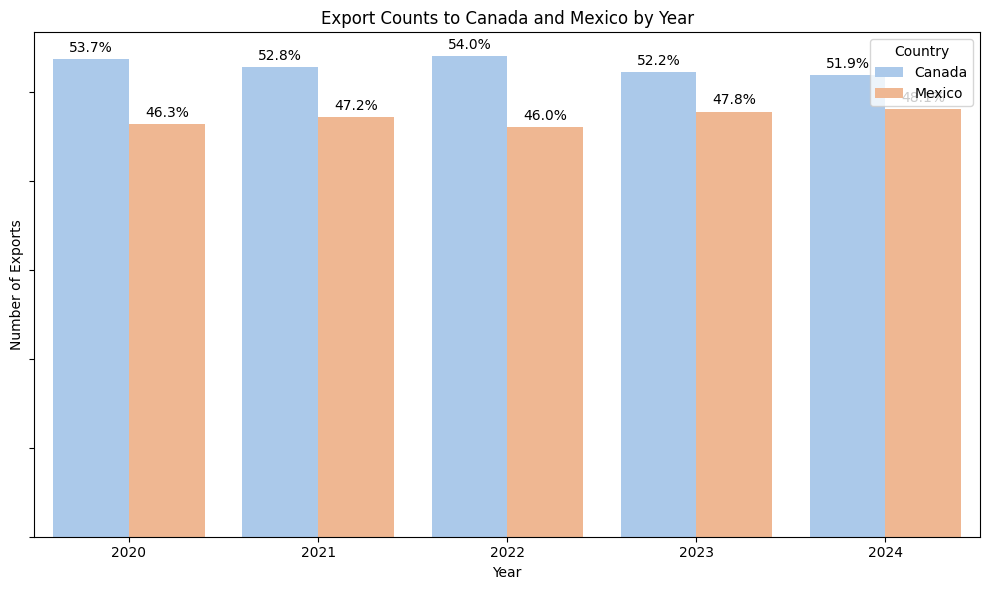

In [117]:
# Extract the year from the 'YEAR' column
df_exports['YEAR'] = df_exports['YEAR'].astype(int)

# Filter for the years 2020 to 2024
df_canada_mexico_exports_filtered = df_exports[
    (df_exports['YEAR'] >= 2020) & (df_exports['YEAR'] <= 2024)
]

# Count the number of exports per year and country
exports_by_year_country = df_canada_mexico_exports_filtered.groupby(['YEAR', 'COUNTRY']).size().reset_index(name='count')

# Calculate the total exports per year to calculate percentages
total_exports_by_year = exports_by_year_country.groupby('YEAR')['count'].sum().reset_index(name='total_count')

# Merge the counts with the total counts
exports_by_year_country = pd.merge(exports_by_year_country, total_exports_by_year, on='YEAR')

# Calculate the percentage for each country per year
exports_by_year_country['percentage'] = (exports_by_year_country['count'] / exports_by_year_country['total_count']) * 100

# Sort the DataFrame by YEAR and COUNTRY to match seaborn's internal order
plot_data = exports_by_year_country.sort_values(by=['YEAR', 'COUNTRY']).reset_index(drop=True)

# Plot using percentage as bar height
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_data, x='YEAR', y='percentage', hue='COUNTRY', palette='pastel')

# Annotate with percentage values
for container in ax.containers:
    # Each container contains bars for one hue group
    labels = [f"{bar.get_height():.1f}%" for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)


# Titles and labels
plt.title('Export Counts to Canada and Mexico by Year')
plt.xlabel('Year')
plt.ylabel('Number of Exports')
plt.legend(title='Country')
plt.tick_params(axis='y', labelleft=False)
plt.tight_layout()
plt.show()




Consistently from 2020 to 2024, US exports more to Canada than Mexico.

Revenue to the US from exports

In [118]:
df_exports.groupby(['YEAR','COUNTRY'])['VALUE'].sum().apply(lambda x: f"${x:,.0f}")

YEAR  COUNTRY
2020  Canada     $186,158,699,398
      Mexico     $153,233,545,603
2021  Canada     $307,000,703,420
      Mexico     $276,458,852,053
2022  Canada     $354,993,501,398
      Mexico     $324,377,863,297
2023  Canada     $352,842,805,147
      Mexico     $323,227,913,110
2024  Canada     $263,307,418,110
      Mexico     $253,405,068,560
Name: VALUE, dtype: object

In [119]:
df_exports.groupby(['YEAR','COUNTRY'])['FREIGHT_CHARGES'].sum().apply(lambda x: f"${x:,.0f}")

YEAR  COUNTRY
2020  Canada     $3,492,508,399
      Mexico                 $0
2021  Canada     $5,267,113,030
      Mexico                 $0
2022  Canada     $5,979,591,444
      Mexico                 $0
2023  Canada     $5,692,020,113
      Mexico                 $0
2024  Canada     $4,136,292,470
      Mexico                 $0
Name: FREIGHT_CHARGES, dtype: object

US does not pay charges on goods exported to Mexico. However, they pay averagely $4.4 billion on charges to Canada each year.

In [120]:
# Country specific export data
df_exports_canada = df_exports[df_exports['COUNTRY'] == 'Canada'].copy()
df_exports_mexico = df_exports[df_exports['COUNTRY'] == 'Mexico'].copy()

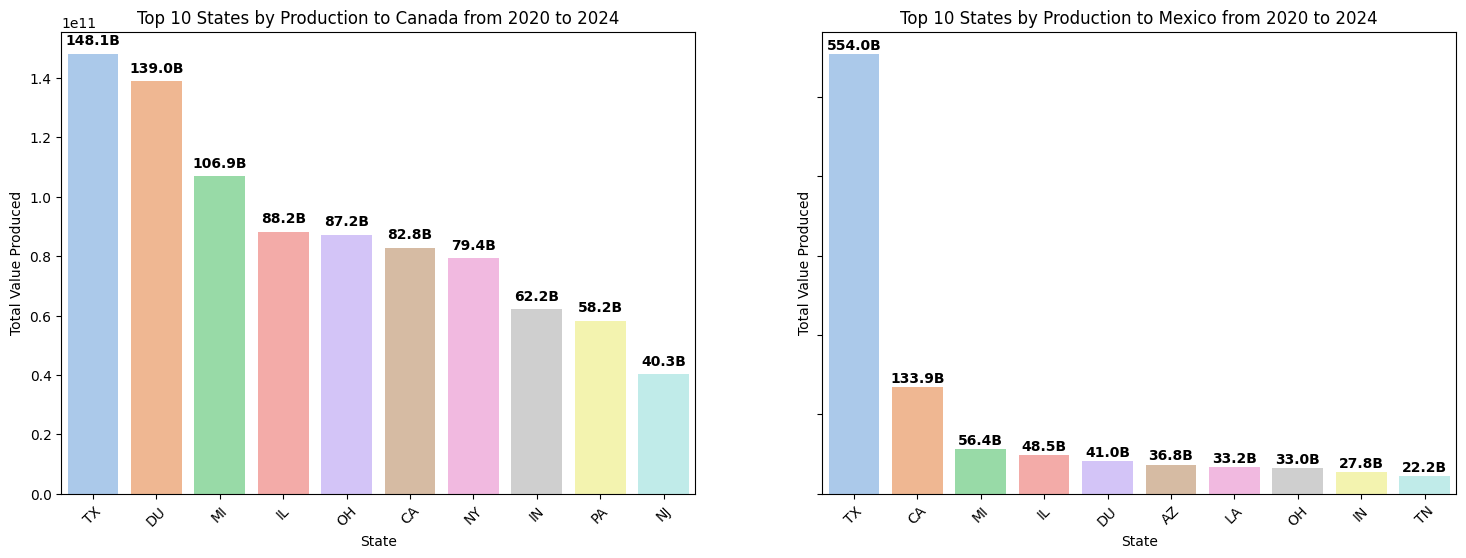

In [121]:
# Calculate total values produced by state for each dataframe
state_production1 = df_exports_canada.groupby('USASTATE')['VALUE'].sum().sort_values(ascending=False)
state_production2 = df_exports_mexico.groupby('USASTATE')['VALUE'].sum().sort_values(ascending=False)

# Function to convert to short format
def format_billions(x):
    return f"{x/1e9:.1f}B"

# Get top 10 states
top10_states_for_canada = state_production1.head(10)
top10_states_for_mexico = state_production2.head(10)

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))#, sharey=True)

# Plot for Canada
sns.barplot(x=top10_states_for_canada.index, y=top10_states_for_canada.values, ax=axes[0], palette='pastel', hue=top10_states_for_canada.index, legend=False)
axes[0].set_title('Top 10 States by Production to Canada from 2020 to 2024')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Value Produced')
axes[0].tick_params(axis='x', rotation=45)

# Annotate each bar with shortened value
for bar in axes[0].patches:
    height = bar.get_height()
    label = format_billions(height)
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        height + 2e9,  # slightly above the bar
        label,
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

sns.barplot(x=top10_states_for_mexico.index, y=top10_states_for_mexico.values, ax=axes[1], palette='pastel', hue=top10_states_for_mexico.index, legend=False)
axes[1].set_title('Top 10 States by Production to Mexico from 2020 to 2024')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Total Value Produced')
axes[1].tick_params(axis='x', rotation=45)

# Annotate each bar with shortened value
for bar in axes[1].patches:
    height = bar.get_height()
    label = format_billions(height)
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height + 2e9,  # slightly above the bar
        label,
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.tick_params(axis='y', labelleft=False)
plt.show()

DU is an unknown state in the US.

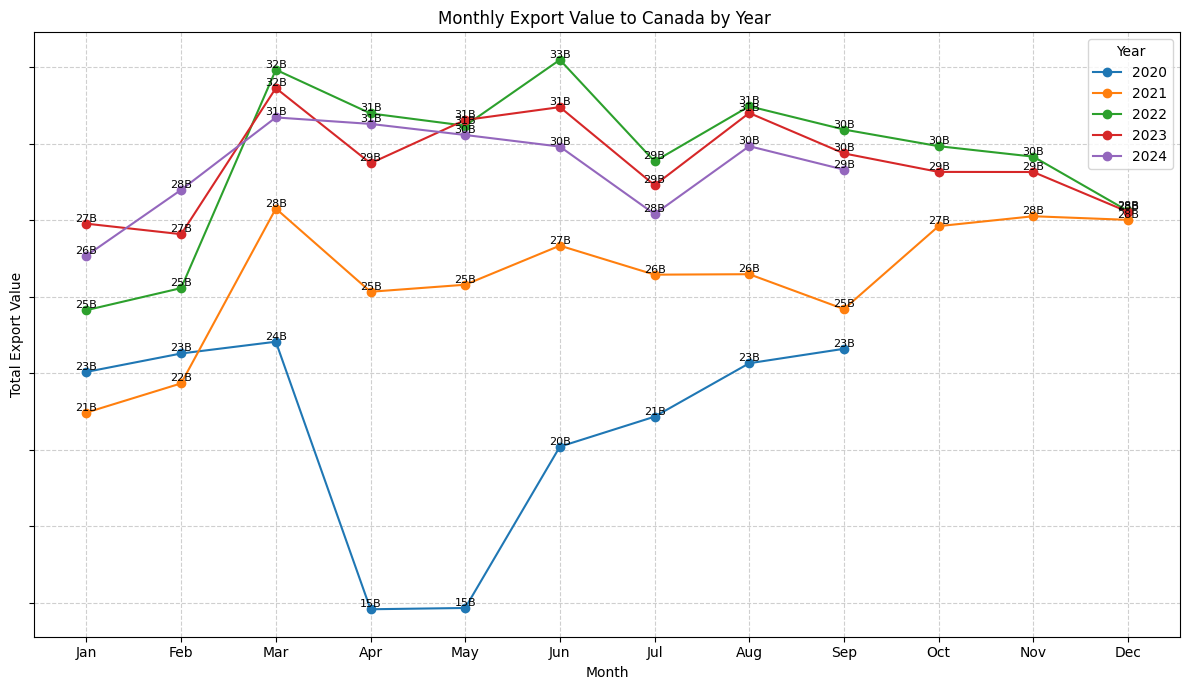

In [122]:
# Group by YEAR and MONTH and sum the VALUE for exports
monthly_export_value = df_exports_canada.groupby(['YEAR', 'MONTH'])['VALUE'].sum().reset_index()

# Create a figure and axes
plt.figure(figsize=(12, 7))

# Plot the VALUE for each month, separating by YEAR
# Use different colors or styles for each year
for year in sorted(monthly_export_value['YEAR'].unique()):
    year_data = monthly_export_value[monthly_export_value['YEAR'] == year]
    plt.plot(year_data['MONTH'], year_data['VALUE'], marker='o', linestyle='-', label=str(year))

# Annotate VALUE for each (YEAR, MONTH) pair
for i in range(len(monthly_export_value)):
    row = monthly_export_value.iloc[i]
    plt.text(
        x=row['MONTH'],
        y=row['VALUE'],
        s=f"{row['VALUE']/1000000000:.0f}B",  # Format with commas
        ha='center',
        va='bottom',
        fontsize=8
    )

# Add titles and labels
plt.title('Monthly Export Value to Canada by Year ')
plt.xlabel('Month')
plt.ylabel('Total Export Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Set x-ticks to month names
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year')
plt.tick_params(axis='y', labelleft=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

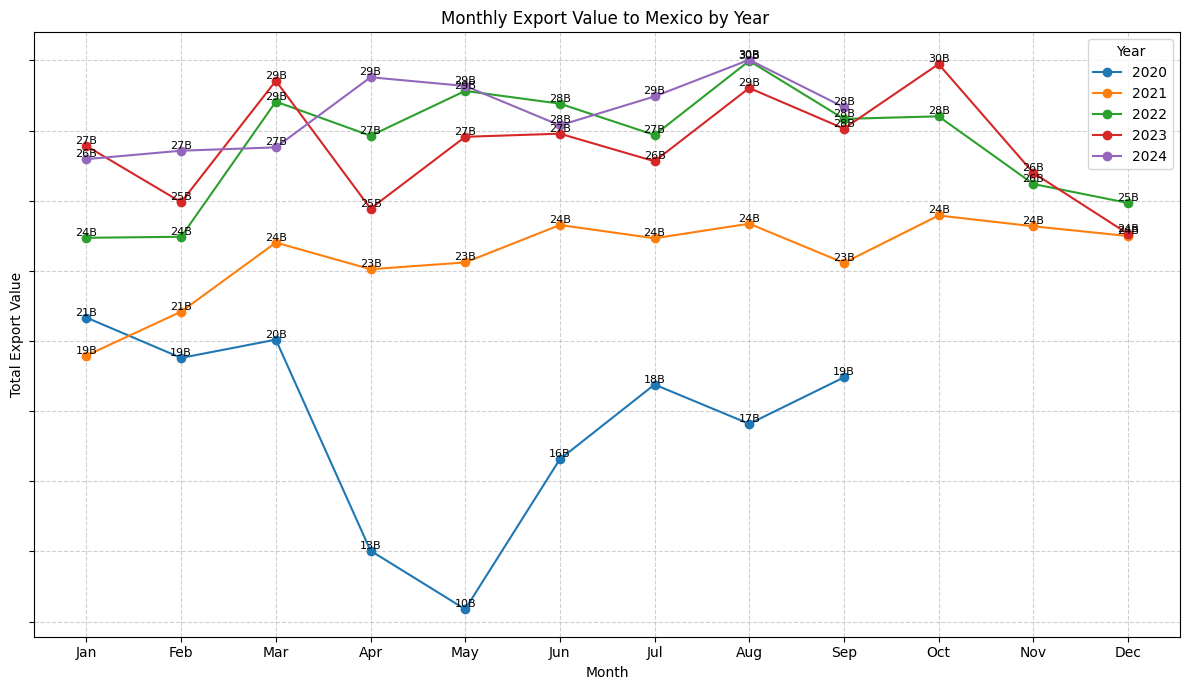

In [123]:
# Group by YEAR and MONTH and sum the VALUE for exports
monthly_export_value2 = df_exports_mexico.groupby(['YEAR', 'MONTH'])['VALUE'].sum().reset_index()

# Create a figure and axes
plt.figure(figsize=(12, 7))

# Plot the VALUE for each month, separating by YEAR
# Use different colors or styles for each year
for year in sorted(monthly_export_value2['YEAR'].unique()):
    year_data = monthly_export_value2[monthly_export_value2['YEAR'] == year]
    plt.plot(year_data['MONTH'], year_data['VALUE'], marker='o', linestyle='-', label=str(year))

# Annotate VALUE for each (YEAR, MONTH) pair
for i in range(len(monthly_export_value2)):
    row = monthly_export_value2.iloc[i]
    plt.text(
        x=row['MONTH'],
        y=row['VALUE'],
        s=f"{row['VALUE']/1000000000:.0f}B",  # Format with commas
        ha='center',
        va='bottom',
        fontsize=8
    )

# Add titles and labels
plt.title('Monthly Export Value to Mexico by Year ')
plt.xlabel('Month')
plt.ylabel('Total Export Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Set x-ticks to month names
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year')
plt.tick_params(axis='y', labelleft=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

For both Canada and Mexico, there are higher revenues during March and October seasonally. <br> This is likely influenced by people trying to get in goods early for the summer and festive winter periods.

### Data Explore by US state

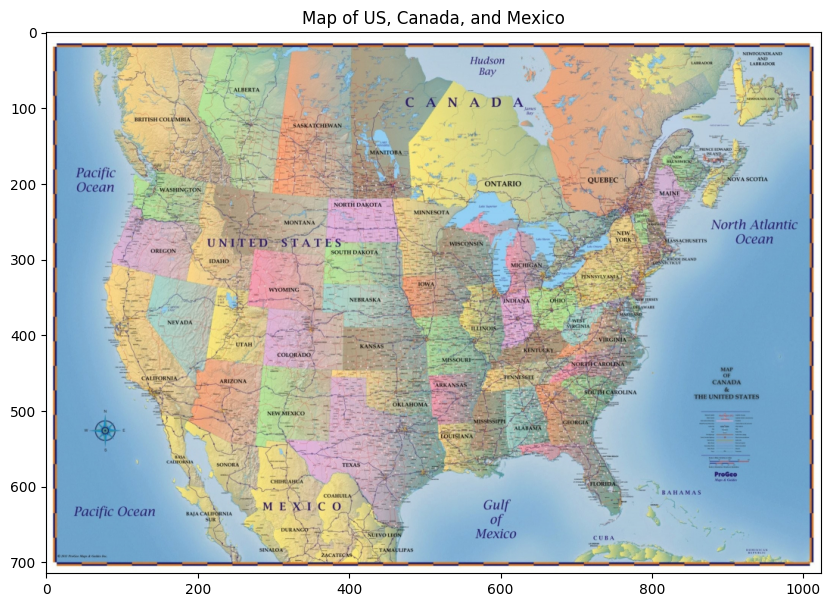

In [124]:
# Path to an image of the US, Canada, and Mexico map (replace with a valid image path)
map_image_path = '/content/drive/MyDrive/Azubi data analytics projects/freight_data_analysis/united-states-map-with-canada-and-mexico.png'

# Load the image
img = Image.open(map_image_path)

# Display the image
plt.figure(figsize=(10, 14))
plt.imshow(img)
plt.title("Map of US, Canada, and Mexico")
plt.show()

* From the map, Texas is the closest state to Mexico and hence expect more of the transport routes to be by truck or rail rather than air or vessel.
* Michigan, Ohio, Indiana, Pennsylvania and Illinois are closest to Ontario Canada and expectation is that there will be more transport over water (vessel likely).

*   DU is an unknown US state
*   So is MX an unknown Mexican state <br>
It is concerning there are unknown states recorded in the data. What could be the reason for these?



Check transport routes for select states in the US to Mexico and Canada.<BR>
Canada
- MI, IL, OH, IN and TX

Mexico
- TX, AZ, CA, MI and IL



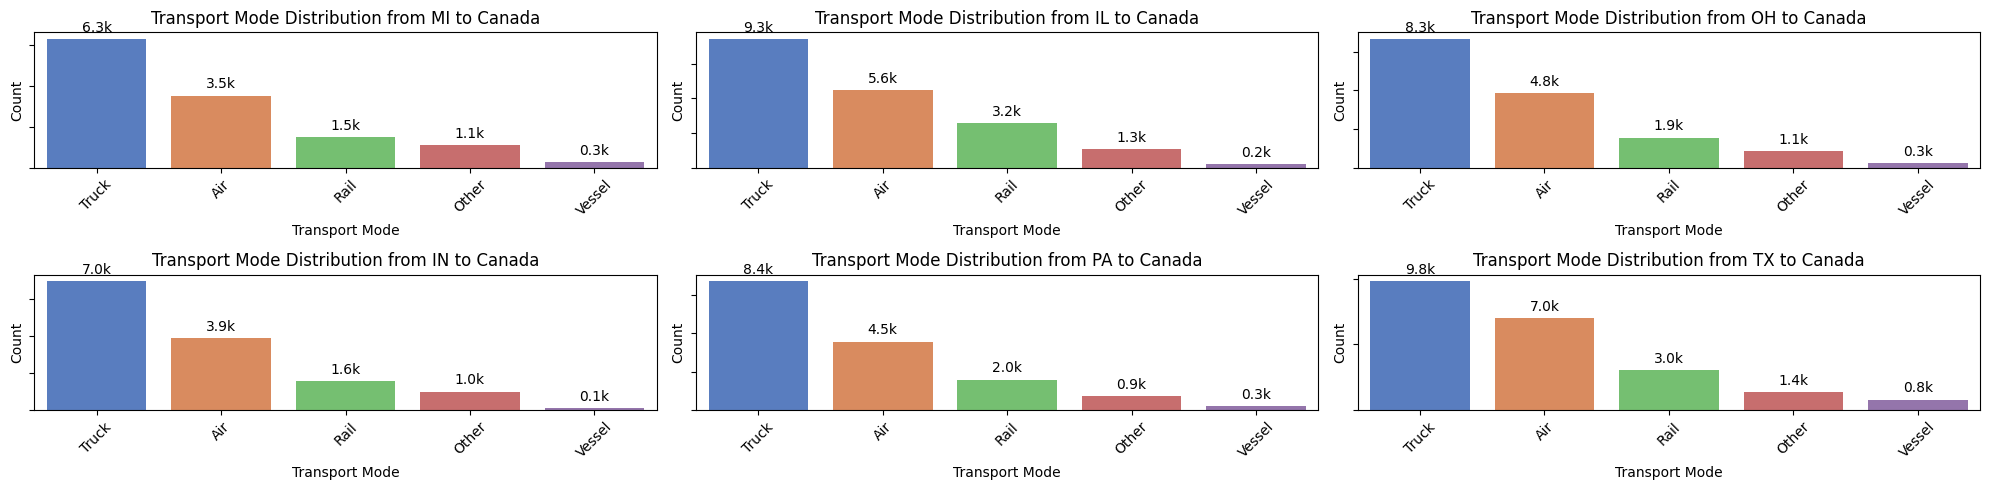

In [125]:
# Define the states to analyze
states_to_analyze = ['MI', 'IL', 'OH', 'IN', 'PA', 'TX']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5), sharey=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through each state and create a subplot
for i, state in enumerate(states_to_analyze):
    # Subset the data for the current state
    df_state = df_exports_canada[df_exports_canada['USASTATE'] == state]

    # Get the top 5 transport modes
    top5_transport_modes = df_state['DISAGMOT'].value_counts().nlargest(5)

    # Plot the data
    sns.barplot(x=top5_transport_modes.index, y=top5_transport_modes.values, ax=axes[i], palette='muted', hue=top5_transport_modes.index, legend=False)
    axes[i].set_title(f'Transport Mode Distribution from {state} to Canada')
    axes[i].set_xlabel('Transport Mode')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelleft=False)

    # Annotate with percentage values
    for container in axes[i].containers:
        # Each container contains bars for one hue group
        labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
        axes[i].bar_label(container, labels=labels, label_type='edge', padding=3)


plt.tight_layout()
plt.show()

Contrary to my assumption, Michigan, Ohio, Indiana, Pennsylvania and Illinois states have strong presence for Truck, Air and rail travel for transporting goods. <BR>
Texas has a very strong air travel presence to Canada and this is due to how far apart the two locations are.

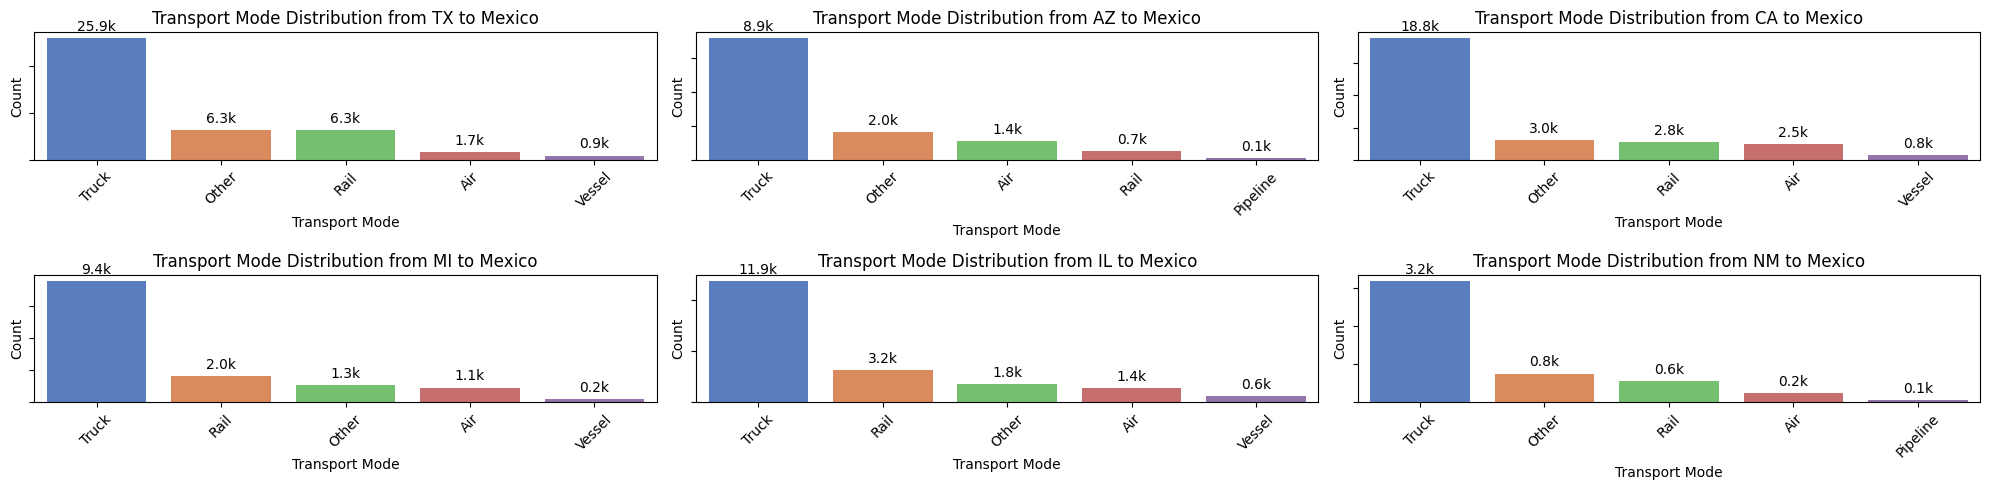

In [126]:
# Define the states to analyze
states_to_analyze = ['TX', 'AZ', 'CA', 'MI', 'IL', 'NM']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5), sharey=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through each state and create a subplot
for i, state in enumerate(states_to_analyze):
    # Subset the data for the current state
    df_state = df_exports_mexico[df_exports_mexico['USASTATE'] == state]

    # Get the top 5 transport modes
    top5_transport_modes = df_state['DISAGMOT'].value_counts().nlargest(5)

    # Plot the data
    sns.barplot(x=top5_transport_modes.index, y=top5_transport_modes.values, ax=axes[i], palette='muted', hue=top5_transport_modes.index, legend=False)
    axes[i].set_title(f'Transport Mode Distribution from {state} to Mexico')
    axes[i].set_xlabel('Transport Mode')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelleft=False)

    # Annotate with percentage values
    for container in axes[i].containers:
        # Each container contains bars for one hue group
        labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
        axes[i].bar_label(container, labels=labels, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Truck dominates for most state transport from US to Mexico. Rail also has a strong standing along with other. <br>
- What could the other be?
- What are the freight charges of the different transport modes to US and Canada?

### Data Explore states in Mexico and Canada

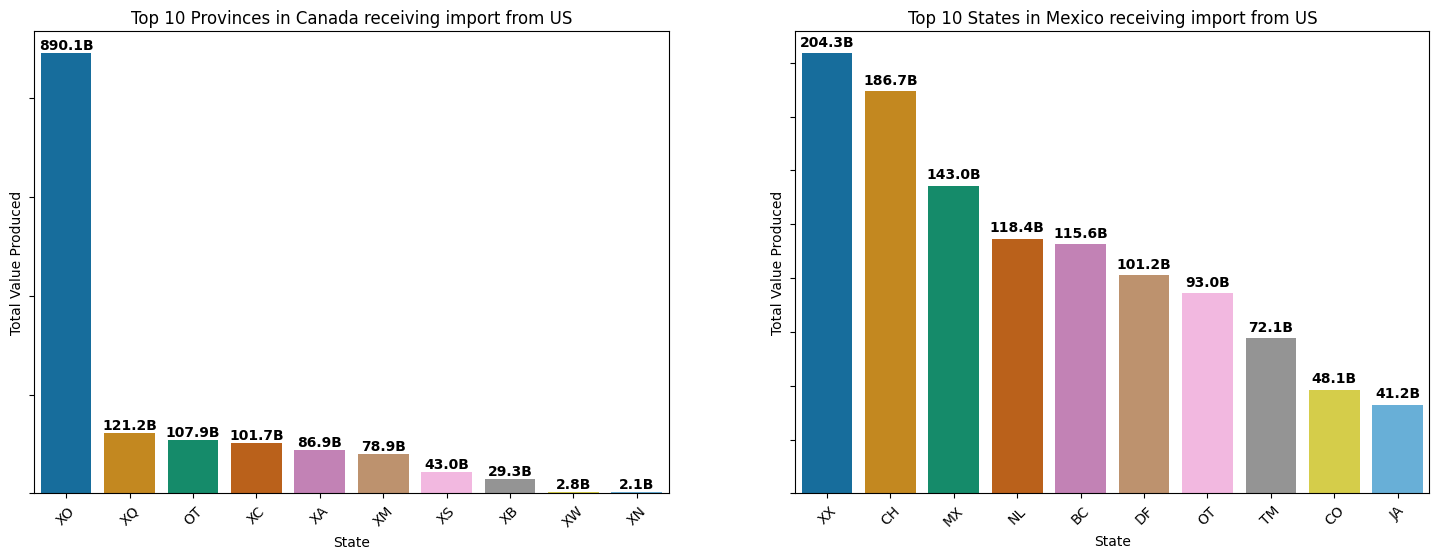

In [127]:
# Calculate total values produced by state for each dataframe
state_receiving1 = df_exports_canada.groupby('CANPROV')['VALUE'].sum().sort_values(ascending=False)
state_receiving2 = df_exports_mexico.groupby('MEXSTATE')['VALUE'].sum().sort_values(ascending=False)

# Get top 10 states
top10_provinces_for_canada = state_receiving1.head(10)
top10_provinces_for_mexico = state_receiving2.head(10)

# Format values in billions
def format_billion(x):
    return f"{x / 1e9:.1f}B"

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))#, sharey=True)

# Plot for Canada
sns.barplot(x=top10_provinces_for_canada.index, y=top10_provinces_for_canada.values, ax=axes[0], palette='colorblind', hue=top10_provinces_for_canada.index, legend=False)
axes[0].set_title('Top 10 Provinces in Canada receiving import from US')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Value Produced')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', labelleft=False)

# Annotate each bar with shortened value
for bar in axes[0].patches:
    height = bar.get_height()
    label = format_billions(height)
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        height + 2e9,  # slightly above the bar
        label,
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

sns.barplot(x=top10_provinces_for_mexico.index, y=top10_provinces_for_mexico.values, ax=axes[1], palette='colorblind', hue=top10_provinces_for_mexico.index, legend=False)
axes[1].set_title('Top 10 States in Mexico receiving import from US')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Total Value Produced')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', labelleft=False)

# Annotate each bar with shortened value
for bar in axes[1].patches:
    height = bar.get_height()
    label = format_billions(height)
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height + 2e9,  # slightly above the bar
        label,
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.show()

Canada
- Makes economic sense for majority of exports from US to go to Ontario and Quebec. They are closer to the Illinois, Ohio, Michigan production states. Air will definitely be a faster travel than vessel. So truck, air, vessel make good sense to those areas.

Mexico
- Chihuahua and Baja California are close to Texas and California respectively. Expectations of more goods there makes fair sense.

- XX state ranks highest but is an unknown state code. States with missing codes also rank high.

### Freight type analysis

In [129]:
# Export charges per freight type

canada_freight_pivot = df_exports_canada.pivot_table(values='FREIGHT_CHARGES', index=['COUNTRY', 'DISAGMOT'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
canada_freight_pivot.map(lambda x: f"${x:,.2f}")

min             max  \
                                 FREIGHT_CHARGES FREIGHT_CHARGES   
COUNTRY DISAGMOT                                                   
Canada  Air                                $0.00   $3,153,913.00   
        Mail (US Postal Service)           $0.00      $42,594.00   
        Other                              $0.00  $59,550,719.00   
        Pipeline                           $0.00     $265,823.00   
        Rail                               $0.00   $7,258,387.00   
        Truck                              $0.00  $25,279,068.00   
        Vessel                             $0.00   $3,437,045.00   

                                            mean  
                                 FREIGHT_CHARGES  
COUNTRY DISAGMOT                                  
Canada  Air                            $6,321.04  
        Mail (US Postal Service)       $4,329.43  
        Other                         $25,671.53  
        Pipeline                         $179.72  
        Rail                          $57,340.17  
        Truck                         $78,688.12  
        Vessel                        $23,952.58

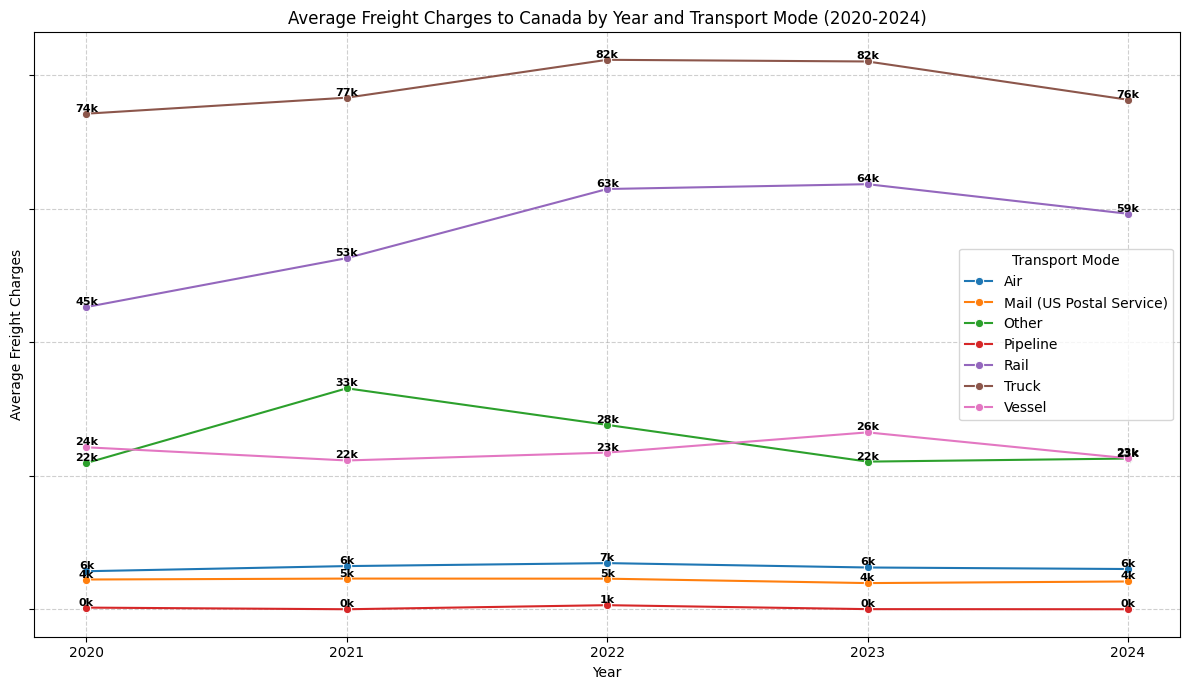

In [130]:
# Filter data for exports to Canada and within the years 2020-2024
df_exports_canada_filtered = df_exports_canada[(df_exports_canada['YEAR'] >= 2020)&(df_exports_canada['YEAR'] <= 2024)].copy()

# Group by year and transport mode, then calculate the mean freight charges
freight_charges_by_year_transport = df_exports_canada_filtered.groupby(['YEAR', 'DISAGMOT'])['FREIGHT_CHARGES'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=freight_charges_by_year_transport,
    x='YEAR',
    y='FREIGHT_CHARGES',
    hue='DISAGMOT',
    marker='o'
)

# Annotate each point with the correct FREIGHT_CHARGES per DISAGMOT
for disagmot in freight_charges_by_year_transport['DISAGMOT'].unique():
    subset = freight_charges_by_year_transport[freight_charges_by_year_transport['DISAGMOT'] == disagmot]
    for i in range(len(subset)):
        row = subset.iloc[i]
        plt.text(
            x=row['YEAR'],
            y=row['FREIGHT_CHARGES'],
            s=f"{row['FREIGHT_CHARGES']/1000:.0f}k",  # Rounded label
            ha='center',
            va='bottom',
            fontsize=8,
            fontweight='bold'
        )

# Add titles and labels
plt.title('Average Freight Charges to Canada by Year and Transport Mode (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Freight Charges')
plt.xticks(range(2020, 2025)) # Ensure all years from 2020 to 2024 are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Transport Mode')
plt.tick_params(axis='y', labelleft=False)


# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [131]:
# Most profitable freight type

canada_trans_value_pivot = df_exports_canada.pivot_table(values='VALUE', index=['COUNTRY', 'DISAGMOT','CONTCODE'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
canada_trans_value_pivot.map(lambda x: f"${x:,.2f}")

min                max  \
                                               VALUE              VALUE   
COUNTRY DISAGMOT                 CONTCODE                                 
Canada  Air                      X         $2,501.00    $262,328,879.00   
        Mail (US Postal Service) X         $2,636.00      $1,456,705.00   
        Other                    X             $1.00  $2,268,295,545.00   
        Pipeline                 X         $2,530.00    $624,811,022.00   
        Rail                     X         $2,500.00    $878,737,045.00   
        Truck                    X         $2,500.00  $1,003,134,742.00   
        Vessel                   X             $0.00    $660,667,952.00   

                                                     mean  
                                                    VALUE  
COUNTRY DISAGMOT                 CONTCODE                  
Canada  Air                      X            $614,037.76  
        Mail (US Postal Service) X            $200,874.79  
        Other                    X          $3,910,194.55  
        Pipeline                 X         $24,646,023.50  
        Rail                     X          $3,021,328.85  
        Truck                    X          $3,861,201.27  
        Vessel                   X         $10,051,507.98

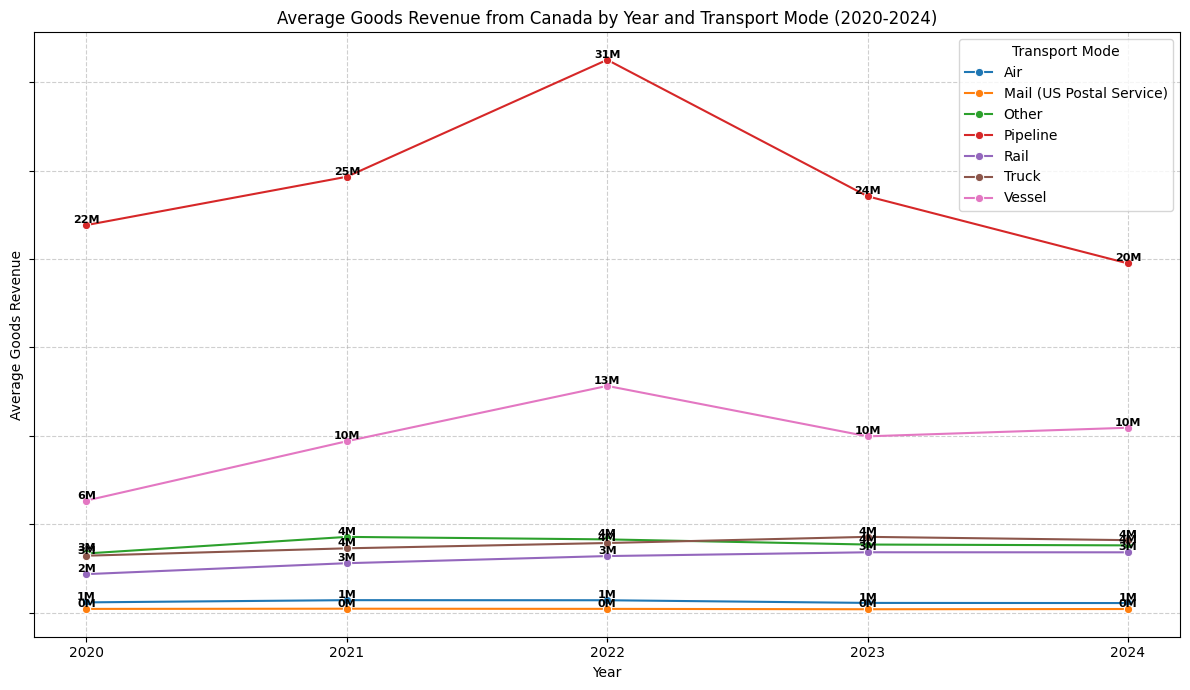

In [132]:
# Filter data for exports to Canada and within the years 2020-2024
df_exports_canada_filtered = df_exports_canada[(df_exports_canada['YEAR'] >= 2020)&(df_exports_canada['YEAR'] <= 2024)].copy()

# Group by year and transport mode, then calculate the mean freight charges
value_worth_by_year_transport = df_exports_canada_filtered.groupby(['YEAR', 'DISAGMOT'])['VALUE'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=value_worth_by_year_transport,
    x='YEAR',
    y='VALUE',
    hue='DISAGMOT',
    marker='o'
)

for disagmot in value_worth_by_year_transport['DISAGMOT'].unique():
    subset = value_worth_by_year_transport[value_worth_by_year_transport['DISAGMOT'] == disagmot]
    for i in range(len(subset)):
        row = subset.iloc[i]
        plt.text(
            x=row['YEAR'],
            y=row['VALUE'],
            s=f"{row['VALUE']/1000000:.0f}M",  # Rounded label
            ha='center',
            va='bottom',
            fontsize=8,
            fontweight='bold'
        )

# Add titles and labels
plt.title('Average Goods Revenue from Canada by Year and Transport Mode (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Goods Revenue')
plt.xticks(range(2020, 2025)) # Ensure all years from 2020 to 2024 are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Transport Mode')
plt.tick_params(axis='y', labelleft=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

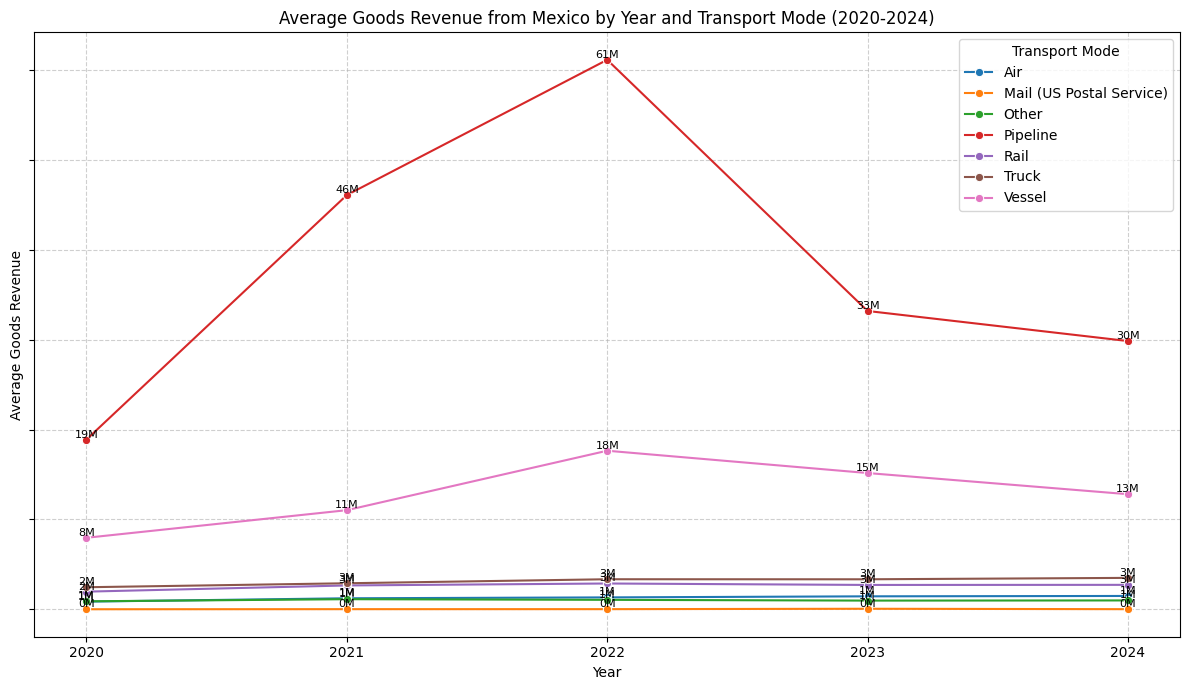

In [133]:
# Filter data for exports to Mexico and within the years 2020-2024
df_exports_mexico_filtered = df_exports_mexico[(df_exports_mexico['YEAR'] >= 2020)&(df_exports_mexico['YEAR'] <= 2024)].copy()

# Group by year and transport mode, then calculate the mean freight charges
value_worth_by_year_transport_mex = df_exports_mexico_filtered.groupby(['YEAR', 'DISAGMOT'])['VALUE'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=value_worth_by_year_transport_mex,
    x='YEAR',
    y='VALUE',
    hue='DISAGMOT',
    marker='o'
)

for disagmot in value_worth_by_year_transport_mex['DISAGMOT'].unique():
    subset = value_worth_by_year_transport_mex[value_worth_by_year_transport_mex['DISAGMOT'] == disagmot]
    for i in range(len(subset)):
        row = subset.iloc[i]
        plt.text(
            x=row['YEAR'],
            y=row['VALUE'],
            s=f"{row['VALUE']/1000000:.0f}M",  # Rounded label
            ha='center',
            va='bottom',
            fontsize=8
        )

# Add titles and labels
plt.title('Average Goods Revenue from Mexico by Year and Transport Mode (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Goods Revenue')
plt.xticks(range(2020, 2025)) # Ensure all years from 2020 to 2024 are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Transport Mode')
plt.tick_params(axis='y', labelleft=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [134]:
# For pipeline transport mode
print("For Canada")
df_check1 = df2[(df2['DISAGMOT']==7)&(df2['COUNTRY']=='Canada')]
print(df_check1['COMMODITY2'].value_counts())
print("="*40)
print("For Mexico")
df_check2 = df2[(df2['DISAGMOT']==7)&(df2['COUNTRY']=='Mexico')]
print(df_check2['COMMODITY2'].value_counts())

For Canada
COMMODITY2
27    2662
29     419
28      58
47      55
25      38
22      29
Name: count, dtype: int64
For Mexico
COMMODITY2
27    725
25     33
44      1
Name: count, dtype: int64


**Commodity types**  <br>
22 Beverages, spirits and vinegar <br>
23 Residues and waste from the food industries; Prepared animal feed <br>
24 Tobacco and manufactured tobacco substitutes <br>
25 Salt; Sulfur; Earths and stone; Plastering materials, lime and cement <br>
26 Ores, slag and ash <br>
27 Mineral fuels, mineral oils and products of their distillation; Bituminous substances; Mineral waxes <br>
28 Inorganic chemicals; Organic or inorganic compounds of precious metals, of rare-earth metals, of radioactive elements or of isotopes <br>
29 Organic chemicals <br>
44 Wood and articles of wood; Wood charcoal <br>
47 Pulp of wood or of other fibrous cellulosic material; Waste and scrap of paper or paperboard

- NB <br>
* Natural minerals and resources are exported through pipelines. It explains why this transport channel earns the highest value for the US.<br>
* The US exports more minerals to Mexico than Canada. Also more minerals are exported more than any other product.

In [135]:
canada_trans_weight_pivot = df_exports_canada.pivot_table(values='SHIPWT', index=['COUNTRY', 'DISAGMOT'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
canada_trans_weight_pivot.map(lambda x: f"{x:,.2f}kg")

min               max             mean
                                  SHIPWT            SHIPWT           SHIPWT
COUNTRY DISAGMOT                                                           
Canada  Air                       0.00kg    1,587,730.00kg       5,177.70kg
        Mail (US Postal Service)  0.00kg            0.00kg           0.00kg
        Other                     0.00kg            0.00kg           0.00kg
        Pipeline                  0.00kg            0.00kg           0.00kg
        Rail                      0.00kg            0.00kg           0.00kg
        Truck                     0.00kg            0.00kg           0.00kg
        Vessel                    0.00kg  937,270,158.00kg  22,473,333.31kg

Vessel and pipeline transport types to Canada generate the most average income, despite their low presence. Freight charges are relatively low, and the average ship weight is also higher. <br>

This means vessels hold more material and the overall charge point is lesser. Considering weight and freight charges, vessel may seem profitable, however, delays in transport may be the most important reason for people's choice.

### Commodity types analysis

In [136]:
## Using df2 dataframe since it has DF and Commodity2

df and commodity 2 will go hand in hand
for mexico and canada find out which goods are domestic and foreign.
check the commodity2 for these products.

In [137]:
# Dictionary map of country code to country
country_mapping = {1220: 'Canada', 2010: 'Mexico'}

# Replace country codes with names
df2['COUNTRY'] = df2['COUNTRY'].replace(country_mapping)

In [138]:
# Locally manufactured exports or re-exports
df_local_canada = df2[(df2['DF'] == 1)&(df2['COUNTRY'] == 'Canada')&(df2['TRDTYPE'] == 1)].copy()
df_foreign_canada = df2[(df2['DF'] == 2)&(df2['COUNTRY'] == 'Canada')&(df2['TRDTYPE'] == 1)].copy()

df_local_mexico = df2[(df2['DF'] == 1)&(df2['COUNTRY'] == 'Mexico')&(df2['TRDTYPE'] == 1)].copy()
df_foreign_mexico = df2[(df2['DF'] == 2)&(df2['COUNTRY'] == 'Mexico')&(df2['TRDTYPE'] == 1)].copy()

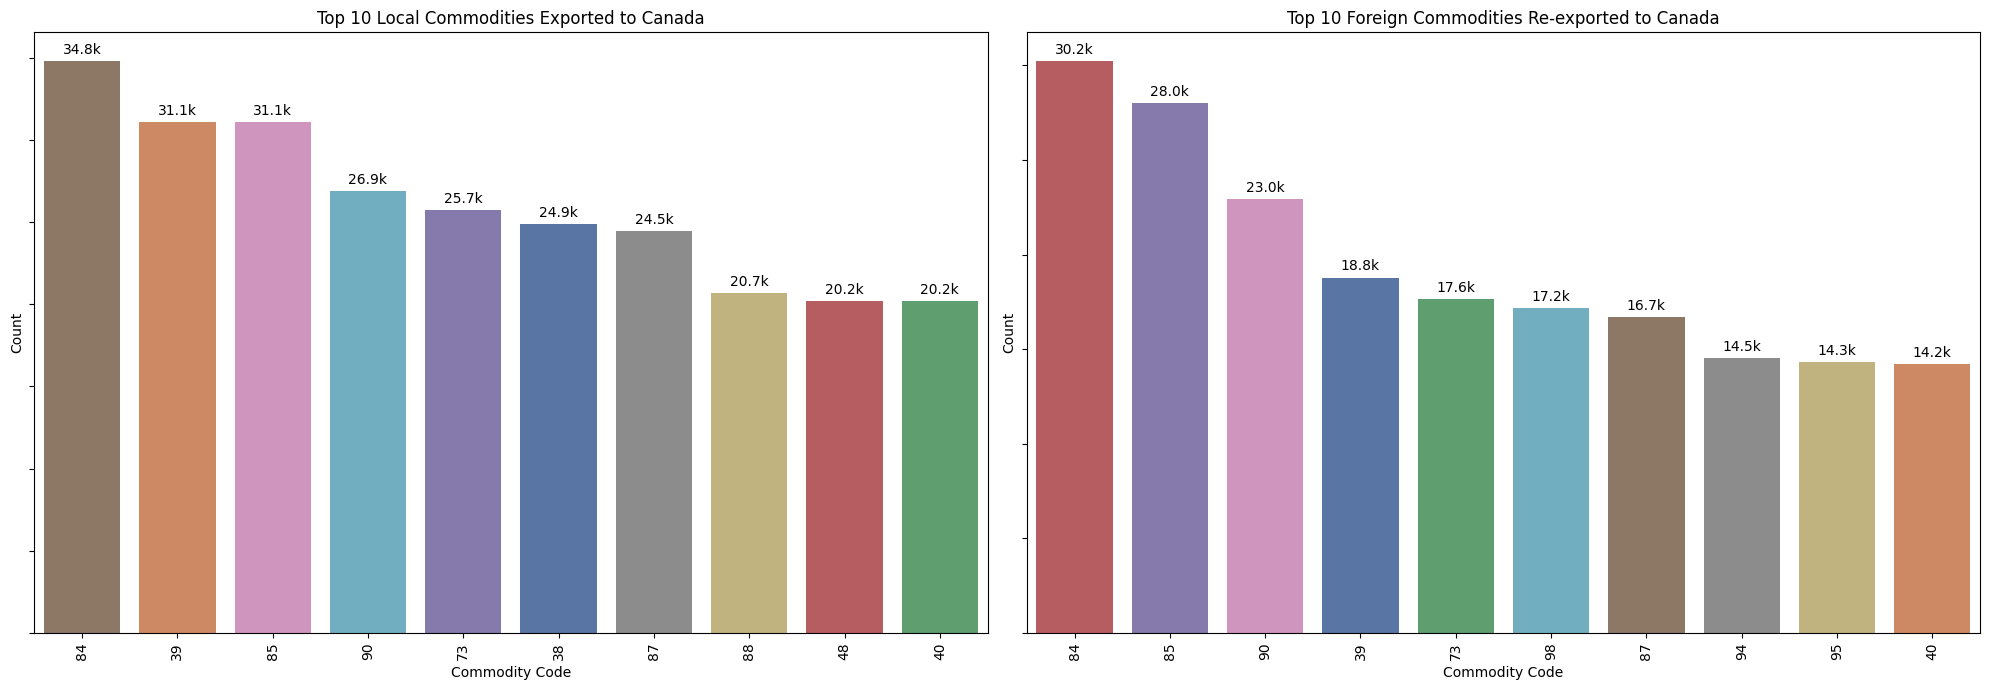

In [139]:
# Analyze top 10 commodities for local and foreign exports to Canada
top10_local_canada = df_local_canada['COMMODITY2'].value_counts().nlargest(10)
top10_foreign_canada = df_foreign_canada['COMMODITY2'].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.barplot(x=top10_local_canada.index, y=top10_local_canada.values, ax=axes[0], palette='deep', hue=top10_local_canada.index, legend=False, order=top10_local_canada.index)
axes[0].set_title('Top 10 Local Commodities Exported to Canada')
axes[0].set_xlabel('Commodity Code')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', labelleft = False)

# Annotate with percentage values
for container in axes[0].containers:
    # Each container contains bars for one hue group
    labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
    axes[0].bar_label(container, labels=labels, label_type='edge', padding=3)

sns.barplot(x=top10_foreign_canada.index, y=top10_foreign_canada.values, ax=axes[1], palette='deep', hue=top10_foreign_canada.index, legend=False, order=top10_foreign_canada.index)
axes[1].set_title('Top 10 Foreign Commodities Re-exported to Canada')
axes[1].set_xlabel('Commodity Code')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', labelleft = False)

# Annotate with percentage values
for container in axes[1].containers:
    # Each container contains bars for one hue group
    labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
    axes[1].bar_label(container, labels=labels, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

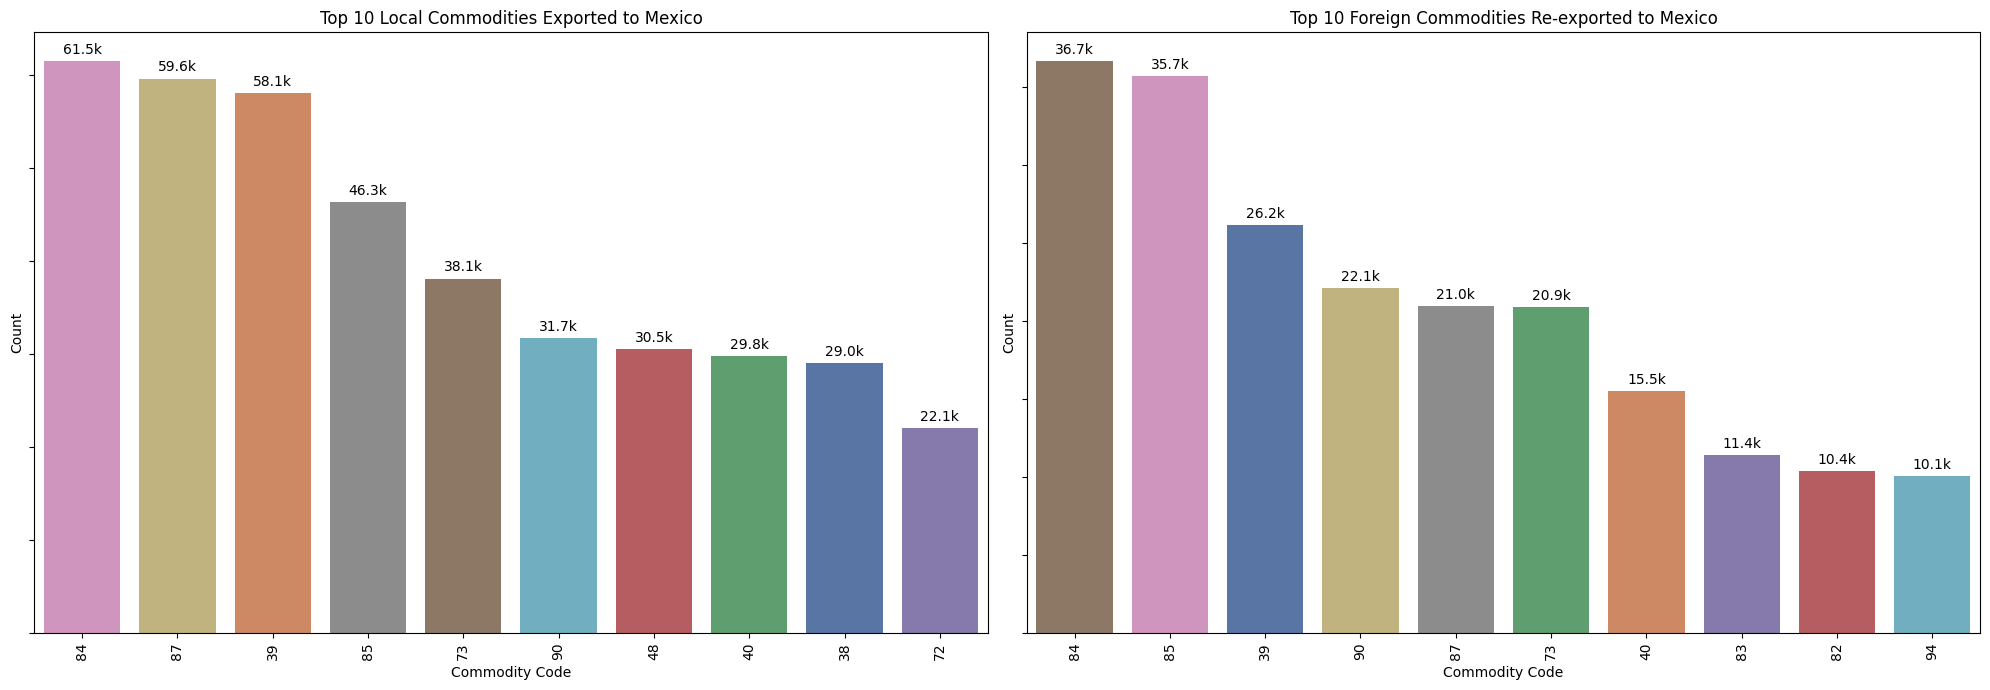

In [140]:
# Analyze top 10 commodities for local and foreign exports to Canada
top10_local_mexico = df_local_mexico['COMMODITY2'].value_counts().nlargest(10)
top10_foreign_mexico = df_foreign_mexico['COMMODITY2'].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.barplot(x=top10_local_mexico.index, y=top10_local_mexico.values, ax=axes[0], palette='deep', hue=top10_local_mexico.index, legend=False, order=top10_local_mexico.index)
axes[0].set_title('Top 10 Local Commodities Exported to Mexico')
axes[0].set_xlabel('Commodity Code')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', labelleft = False)

# Annotate with percentage values
for container in axes[0].containers:
    # Each container contains bars for one hue group
    labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
    axes[0].bar_label(container, labels=labels, label_type='edge', padding=3)

sns.barplot(x=top10_foreign_mexico.index, y=top10_foreign_mexico.values, ax=axes[1], palette='deep', hue=top10_foreign_mexico.index, legend=False, order=top10_foreign_mexico.index)
axes[1].set_title('Top 10 Foreign Commodities Re-exported to Mexico')
axes[1].set_xlabel('Commodity Code')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', labelleft = False)

# Annotate with percentage values
for container in axes[1].containers:
    # Each container contains bars for one hue group
    labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
    axes[1].bar_label(container, labels=labels, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Majority of local-made and foreign-made exports cover the same commodity types. <br>The US is able to produce enough for itself and share those of other country made.


In [141]:
df_foreign_canada['COMMODITY2'].value_counts(ascending=False).head(10)

COMMODITY2
84    30237
85    28002
90    22951
39    18788
73    17644
98    17179
87    16678
94    14510
95    14321
40    14225
Name: count, dtype: int64

**Commodity codes explained** <br>
38 Miscellaneous chemical products <br>
39 Plastics and articles thereof <br>
40 Rubber and articles thereof <br>
48 Paper and paperboard; Articles of paper pulp, of paper or of paperboard <br>
72 Iron and steel <br>
73 Articles of iron or steel <br>
82 Tools, implements, cutlery, spoons and forks, of base metal; Parts thereof of base metal <br>
83 Miscellaneous articles of base metal <br>
84 Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof <br>
85 Electrical machinery and equipment and parts thereof; Sound recorders and reproducers, television image and sound recorders and reproducers, and parts and accessories of such articles <br>
86 Railway or tramway locomotives, rolling stock and parts thereof; railway or tramway track fixtures and fittings and parts thereof; Mechanical (including electromechanical) traffic signaling equipment of all kinds <br>
87 Vehicles, other than railway or tramway rolling stock, and parts and accessories thereof <br>
90 Optical, photographic, cinematographic, measuring, checking, precision, medical or surgical instruments and apparatus; Parts and accessories thereof <br>
94 Furniture; Bedding, mattress supports, cushions and similar stuffed furnishings; Lamps and lighting fittings, not elsewhere specified or included; Illuminated signs, illuminated nameplates and the like; Prefabricated buildings <br>

- The list above forms the bulk of exported materials from US to Canada and Mexico

### Explore Container type

In [142]:
print(df_exports_canada.groupby(['DISAGMOT','CONTCODE'])['FREIGHT_CHARGES'].sum())
print("="*60)
print(df_exports_mexico.groupby(['DISAGMOT','CONTCODE'])['FREIGHT_CHARGES'].sum())

DISAGMOT                  CONTCODE
Air                       X             931196426
Mail (US Postal Service)  X               2402835
Other                     X             963016062
Pipeline                  X                340578
Rail                      X            3187711999
Truck                     X           19330758647
Vessel                    X             152098909
Name: FREIGHT_CHARGES, dtype: int64
DISAGMOT                  CONTCODE
Air                       0           0
                          1           0
Mail (US Postal Service)  X           0
Other                     X           0
Pipeline                  X           0
Rail                      0           0
                          1           0
Truck                     0           0
                          1           0
Vessel                    0           0
                          1           0
Name: FREIGHT_CHARGES, dtype: int64


In [143]:
# Inspecting containerized type to Canada
print(df_local_canada['CONTCODE'].value_counts())
print(df_foreign_canada['CONTCODE'].value_counts())

CONTCODE
X    915169
Name: count, dtype: int64
CONTCODE
X    533089
Name: count, dtype: int64


In [144]:
# Inspecting containerized type to Canada
print((df_local_mexico['CONTCODE'].value_counts()/df_local_mexico.shape[0])*100)
print("="*30)
print((df_foreign_mexico['CONTCODE'].value_counts()/df_foreign_mexico.shape[0])*100)

CONTCODE
0    85.057508
1    10.564030
X     4.378462
Name: count, dtype: float64
CONTCODE
0    93.039086
1     4.286929
X     2.673985
Name: count, dtype: float64


* Goods exported to Mexico by Air, Rail, Truck or Vessel are not containerized.
* All products exported from US to Canada are containerized.
* 95% of foreign products re-exported from US are not containerized. 85% of local products from US to Mexico are not containerized. In both cases, containerized products to Mexico form less than 5%.
* There are container code types that are not listed in the code sheet.
* Mechanical, electrical and car part appliances contribute to the most transported materials from US to Mexico. Majority of these transports are not containarized.

## Import-data analysis

### Inspecting dataframes and replacing column values

In [145]:
# Exploring import data from df1 and df2. These dataframes contain information about individual states in all 3 countries
df2_imports = df2[df2['TRDTYPE'] == 2]
df1_imports = df1[df1['TRDTYPE'] == 2]

In [146]:
print(df1_imports.shape)
print(df1_imports.isnull().sum())
print("="*40)
print(df2_imports.shape)
print(df2_imports.isnull().sum())

(565200, 14)
TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           565200
CANPROV            112190
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                 565200
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64
(1251187, 14)
TRDTYPE                  0
USASTATE                 0
COMMODITY2               0
DISAGMOT                 0
MEXSTATE           1251187
CANPROV             249613
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 1251187
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64


- Data contained in both dataframes show that there is no import from any of the Mexico states into USA.
- The DF column which indicates whether goods are manufactured in the USA or elsewhere are also empty. This makes sense since import goods cannot be manufactured in the USA.
- I am curious as to why there are no goods from the Mexican states. What then does the data from Mexico represent. In essence, we know there are imports from Mexico but cannot determine from which state the goods are from.

In [147]:
df1_imports[df1_imports['COUNTRY']==2010]

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY   VALUE  \
14983          2       AK  20XX         3      NaN     NaN     2010   10313   
14992          2       AK  20XX         5      NaN     NaN     2010   15291   
14993          2       AK  2304         5      NaN     NaN     2010   29978   
14994          2       AK  2304         6      NaN     NaN     2010  592671   
14995          2       AK  2401         5      NaN     NaN     2010   12360   
...          ...      ...   ...       ...      ...     ...      ...     ...   
1500421        2       WY  2507         5      NaN     NaN     2010   71848   
1500433        2       WY  30XX         5      NaN     NaN     2010    7004   
1500441        2       WY  3307         3      NaN     NaN     2010    2050   
1500453        2       WY  33XX         5      NaN     NaN     2010   23409   
1500484        2       WY  41XX         3      NaN     NaN     2010   11931   

         SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
14983        70             1176 NaN        0      4  2020  
14992        10              450 NaN        0      4  2020  
14993      6390              744 NaN        0      4  2020  
14994    345061           170282 NaN        1      4  2020  
14995     12795             6432 NaN        0      4  2020  
...         ...              ...  ..      ...    ...   ...  
1500421   30180               12 NaN        0      9  2024  
1500433     210               64 NaN        0      9  2024  
1500441       5                1 NaN        0      9  2024  
1500453     381              105 NaN        0      9  2024  
1500484      38              136 NaN        0      9  2024  

[112190 rows x 14 columns]

In [148]:
# Settle on using df1 like in the export data
df_imports_final = df1[df1['TRDTYPE'] == 2].copy()

# Dictionary map of country code to country
country_mapping = {1220: 'Canada', 2010: 'Mexico'}
# Replace country codes with names
df_imports_final['COUNTRY'] = df_imports_final['COUNTRY'].replace(country_mapping)


# Dictionary map of freight code to freight type
transport_mode_mapping = {1:'Vessel', 3:'Air', 4:'Mail (US Postal Service)', 5:'Truck',\
                          6:'Rail', 7:'Pipeline', 8:'Other', 9:'Foreign Trade Zones (FTZs)'}
# Replace transport mode codes with names
df_imports_final['DISAGMOT'] = df_imports_final['DISAGMOT'].replace(transport_mode_mapping)

In [149]:
# Check for dataframe shape
print(df_imports_final.shape)
# Check for null values
print("Nulls in DF_export:\n", df_imports_final.isnull().sum())

(565200, 14)
Nulls in DF_export:
 TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           565200
CANPROV            112190
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                 565200
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64


Imported goods from Mexico are stateless. There are imported goods from unknown provinces in Canada.

In [150]:
# Replace the missing values in CANPROV with unknown

df_imports_final.fillna({'CANPROV':'unknown'}, inplace=True)

print("\nNulls in DF_export after filling:\n", df_imports_final.isnull().sum())


Nulls in DF_export after filling:
 TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           565200
CANPROV                 0
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                 565200
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64


### Import numbers by country

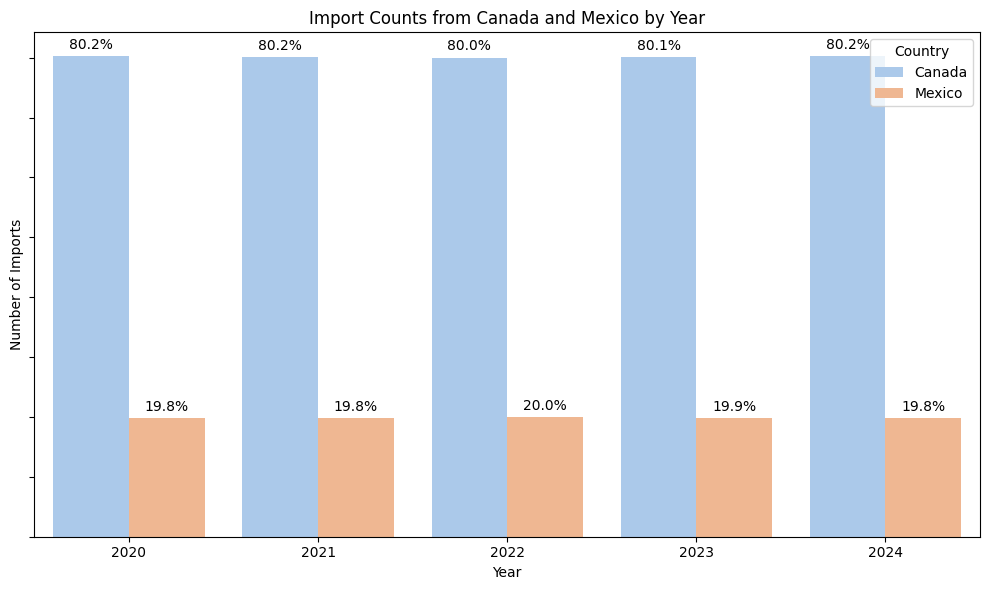

In [151]:
# Extract the year from the 'YEAR' column
df_imports_final['YEAR'] = df_imports_final['YEAR'].astype(int)

# Filter for the years 2020 to 2024
df_canada_mexico_imports_filtered = df_imports_final[
    (df_imports_final['YEAR'] >= 2020) & (df_imports_final['YEAR'] <= 2024)
]

# Count the number of exports per year and country
imports_by_year_country = df_canada_mexico_imports_filtered.groupby(['YEAR', 'COUNTRY']).size().reset_index(name='count')

# Calculate the total exports per year to calculate percentages
total_imports_by_year = imports_by_year_country.groupby('YEAR')['count'].sum().reset_index(name='total_count')

# Merge the counts with the total counts
imports_by_year_country = pd.merge(imports_by_year_country, total_imports_by_year, on='YEAR')

# Calculate the percentage for each country per year
imports_by_year_country['percentage'] = (imports_by_year_country['count'] / imports_by_year_country['total_count']) * 100

# Sort the DataFrame by YEAR and COUNTRY to match seaborn's internal order
plot_data_import = imports_by_year_country.sort_values(by=['YEAR', 'COUNTRY']).reset_index(drop=True)

# Plot using percentage as bar height
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_data_import, x='YEAR', y='percentage', hue='COUNTRY', palette='pastel')

# Annotate with percentage values
for container in ax.containers:
    # Each container contains bars for one hue group
    labels = [f"{bar.get_height():.1f}%" for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)


# Titles and labels
plt.title('Import Counts from Canada and Mexico by Year')
plt.xlabel('Year')
plt.ylabel('Number of Imports')
plt.legend(title='Country')
plt.tick_params(axis='y', labelleft=False)
plt.tight_layout()
plt.show()




Consistently from 2020 to 2024, US imports more from Canada than Mexico.

Cost to the US from imports

In [152]:
df_imports_final.groupby(['YEAR','COUNTRY'])['VALUE'].sum().apply(lambda x: f"${x:,.0f}")

YEAR  COUNTRY
2020  Canada     $196,741,413,297
      Mexico     $232,785,771,119
2021  Canada     $357,159,803,329
      Mexico     $384,705,467,272
2022  Canada     $437,728,957,576
      Mexico     $454,929,951,197
2023  Canada     $421,096,201,172
      Mexico     $475,606,741,986
2024  Canada     $309,337,190,256
      Mexico     $378,884,517,270
Name: VALUE, dtype: object

Although fewer imports, goods from Mexico cost more. Investigate what types of goods are mostly imported.

In [153]:
df_imports_final.groupby(['YEAR','COUNTRY'])['FREIGHT_CHARGES'].sum().apply(lambda x: f"${x:,.0f}")

YEAR  COUNTRY
2020  Canada      $5,063,248,605
      Mexico      $2,533,305,539
2021  Canada      $8,577,716,746
      Mexico      $3,672,642,506
2022  Canada     $10,606,082,368
      Mexico      $4,275,051,852
2023  Canada     $10,099,647,793
      Mexico      $4,473,681,274
2024  Canada      $7,220,653,762
      Mexico      $3,137,499,542
Name: FREIGHT_CHARGES, dtype: object

Imports from Mexico to the US attract lower freight charges than products from Canada.

In [154]:
# Country specific export data
df_imports_canada = df_imports_final[df_imports_final['COUNTRY'] == 'Canada'].copy()
df_imports_mexico = df_imports_final[df_imports_final['COUNTRY'] == 'Mexico'].copy()

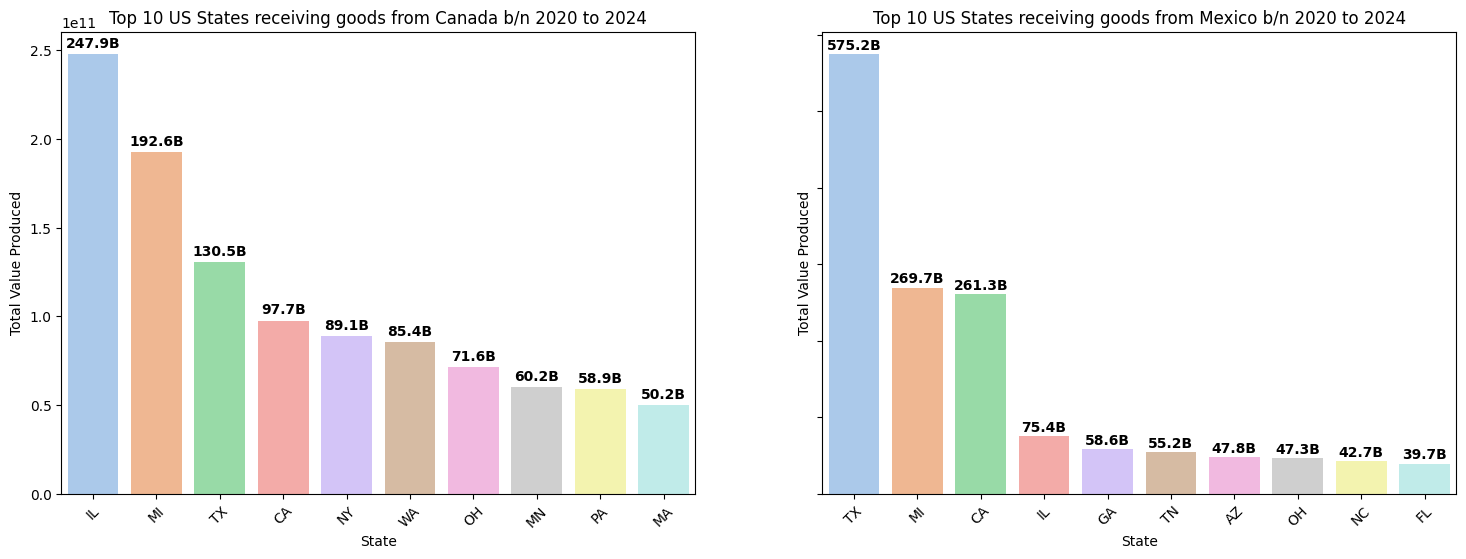

In [155]:
# Calculate total values produced by state for each dataframe
import_state_production1 = df_imports_canada.groupby('USASTATE')['VALUE'].sum().sort_values(ascending=False)
import_state_production2 = df_imports_mexico.groupby('USASTATE')['VALUE'].sum().sort_values(ascending=False)

# Function to convert to short format
def format_billions(x):
    return f"{x/1e9:.1f}B"

# Get top 10 states
us_import_states_from_canada = import_state_production1.head(10)
us_import_states_from_mexico = import_state_production2.head(10)

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))#, sharey=True)

# Plot for Canada
sns.barplot(x=us_import_states_from_canada.index, y=us_import_states_from_canada.values, ax=axes[0], palette='pastel', hue=us_import_states_from_canada.index, legend=False)
axes[0].set_title('Top 10 US States receiving goods from Canada b/n 2020 to 2024')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Value Produced')
axes[0].tick_params(axis='x', rotation=45)

# Annotate each bar with shortened value
for bar in axes[0].patches:
    height = bar.get_height()
    label = format_billions(height)
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        height + 2e9,  # slightly above the bar
        label,
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

sns.barplot(x=us_import_states_from_mexico.index, y=us_import_states_from_mexico.values, ax=axes[1], palette='pastel', hue=us_import_states_from_mexico.index, legend=False)
axes[1].set_title('Top 10 US States receiving goods from Mexico b/n 2020 to 2024')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Total Value Produced')
axes[1].tick_params(axis='x', rotation=45)

# Annotate each bar with shortened value
for bar in axes[1].patches:
    height = bar.get_height()
    label = format_billions(height)
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height + 2e9,  # slightly above the bar
        label,
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.tick_params(axis='y', labelleft=False)
plt.show()

- Illinois receives the most imports from Canada. It is among the states closer to Canada.
- Texas also receives the most imports from Mexico. Texas, again is closest to Mexico.

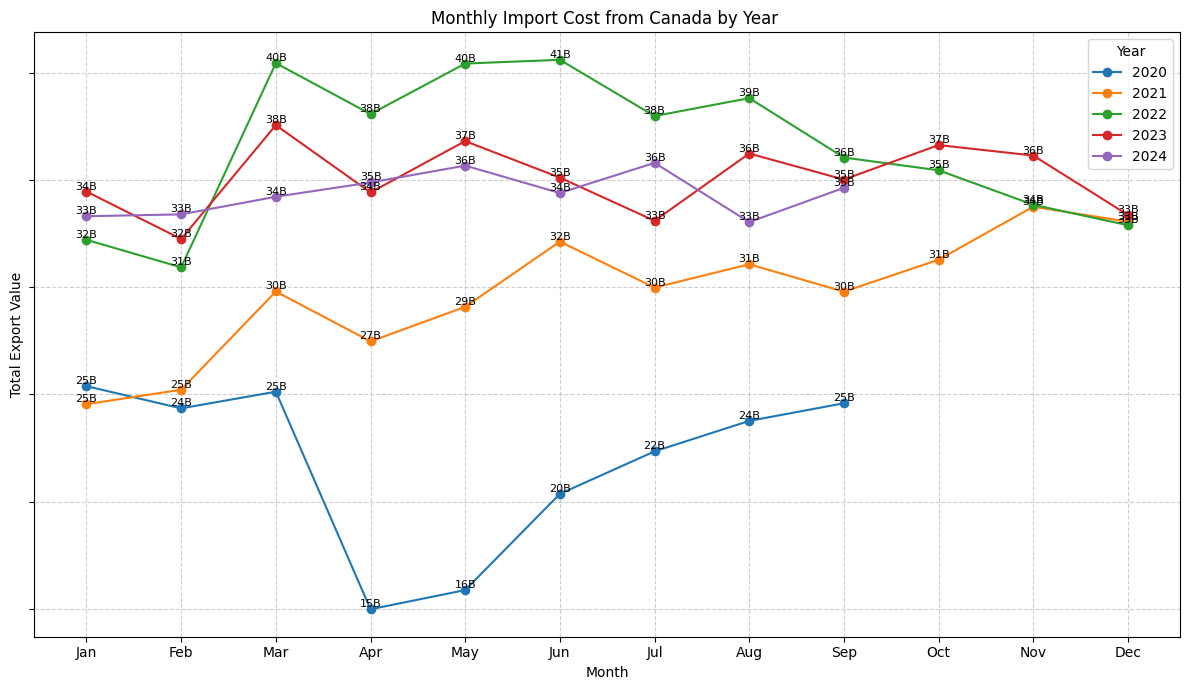

In [156]:
# Group by YEAR and MONTH and sum the VALUE for exports
monthly_import_value = df_imports_canada.groupby(['YEAR', 'MONTH'])['VALUE'].sum().reset_index()

# Create a figure and axes
plt.figure(figsize=(12, 7))

# Plot the VALUE for each month, separating by YEAR
# Use different colors or styles for each year
for year in sorted(monthly_import_value['YEAR'].unique()):
    year_data = monthly_import_value[monthly_import_value['YEAR'] == year]
    plt.plot(year_data['MONTH'], year_data['VALUE'], marker='o', linestyle='-', label=str(year))

# Annotate VALUE for each (YEAR, MONTH) pair
for i in range(len(monthly_import_value)):
    row = monthly_import_value.iloc[i]
    plt.text(
        x=row['MONTH'],
        y=row['VALUE'],
        s=f"{row['VALUE']/1000000000:.0f}B",  # Format with commas
        ha='center',
        va='bottom',
        fontsize=8
    )

# Add titles and labels
plt.title('Monthly Import Cost from Canada by Year ')
plt.xlabel('Month')
plt.ylabel('Total Export Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Set x-ticks to month names
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year')
plt.tick_params(axis='y', labelleft=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

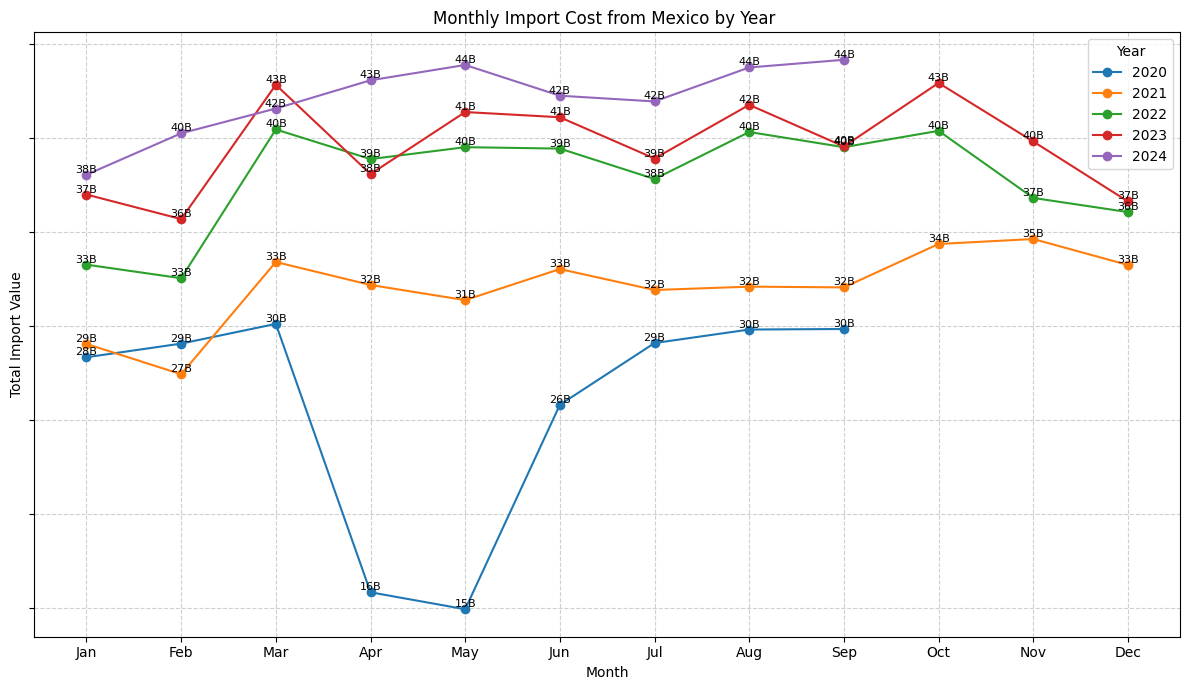

In [157]:
# Group by YEAR and MONTH and sum the VALUE for exports
monthly_import_value2 = df_imports_mexico.groupby(['YEAR', 'MONTH'])['VALUE'].sum().reset_index()

# Create a figure and axes
plt.figure(figsize=(12, 7))

# Plot the VALUE for each month, separating by YEAR
# Use different colors or styles for each year
for year in sorted(monthly_import_value2['YEAR'].unique()):
    year_data = monthly_import_value2[monthly_import_value2['YEAR'] == year]
    plt.plot(year_data['MONTH'], year_data['VALUE'], marker='o', linestyle='-', label=str(year))

# Annotate VALUE for each (YEAR, MONTH) pair
for i in range(len(monthly_import_value2)):
    row = monthly_import_value2.iloc[i]
    plt.text(
        x=row['MONTH'],
        y=row['VALUE'],
        s=f"{row['VALUE']/1000000000:.0f}B",  # Format with commas
        ha='center',
        va='bottom',
        fontsize=8
    )

# Add titles and labels
plt.title('Monthly Import Cost from Mexico by Year ')
plt.xlabel('Month')
plt.ylabel('Total Import Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Set x-ticks to month names
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year')
plt.tick_params(axis='y', labelleft=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

### Data Explore by US state

Check transport routes for select states in the US to Mexico and Canada.<BR>
Canada
- MI, IL, OH, IN and TX

Mexico
- TX, AZ, CA, MI and IL



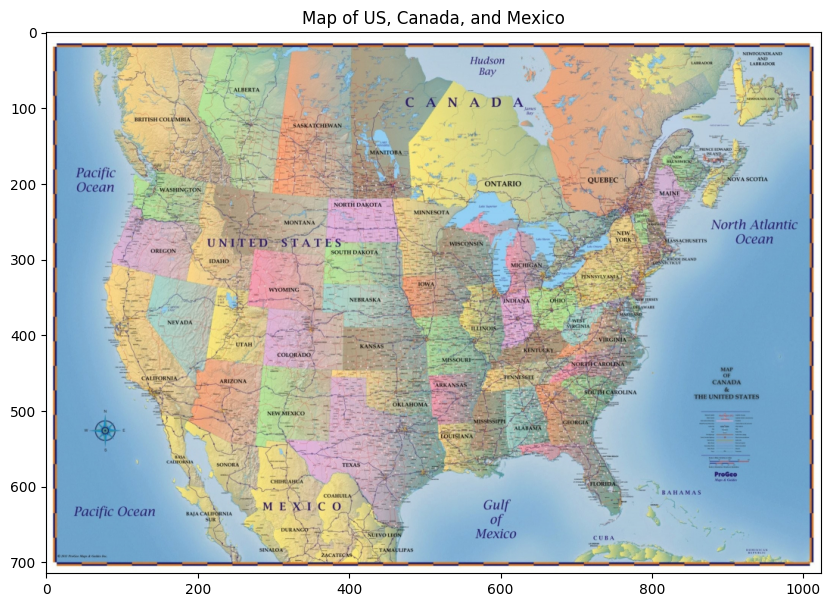

In [158]:
# Load map for better state visualisation
# Path to an image of the US, Canada, and Mexico map (replace with a valid image path)
map_image_path = '/content/drive/MyDrive/Azubi data analytics projects/freight_data_analysis/united-states-map-with-canada-and-mexico.png'

# Load the image
img = Image.open(map_image_path)

# Display the image
plt.figure(figsize=(10, 14))
plt.imshow(img)
plt.title("Map of US, Canada, and Mexico")
plt.show()

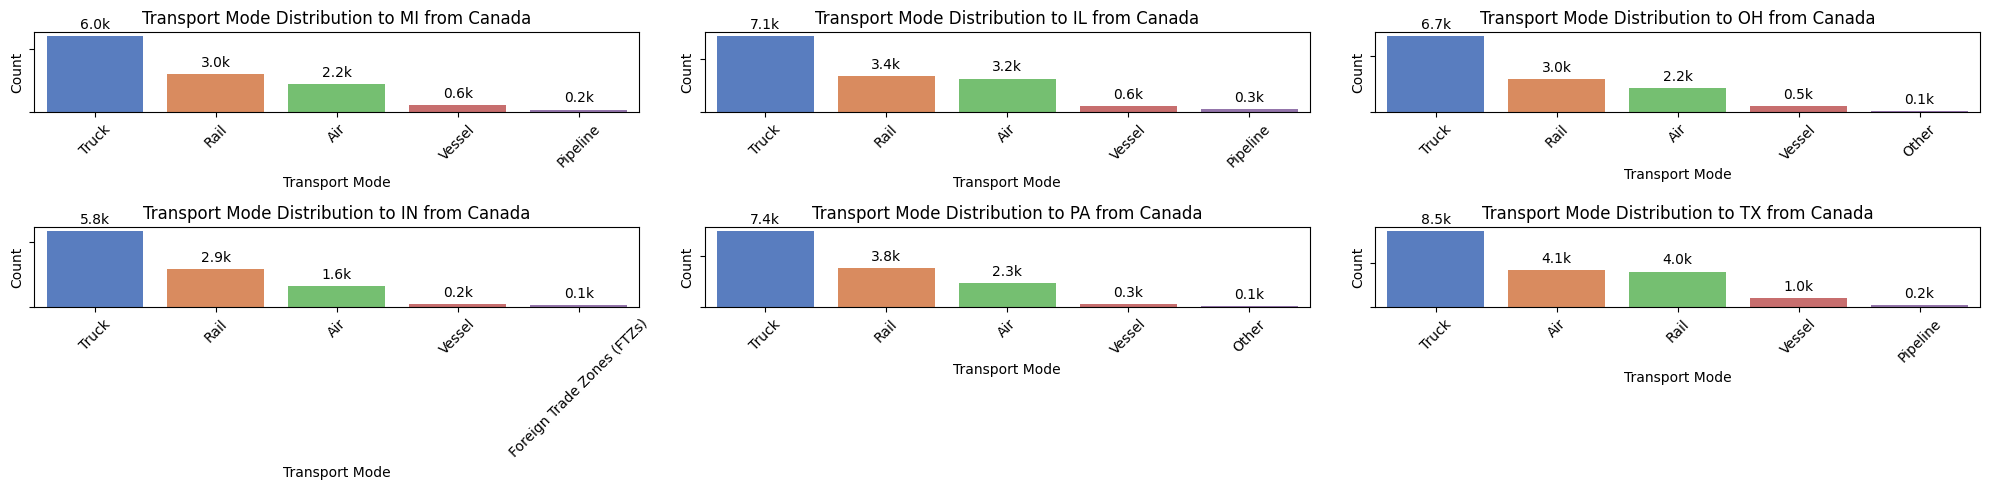

In [159]:
# Define the states to analyze
states_to_analyze = ['MI', 'IL', 'OH', 'IN', 'PA', 'TX']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5), sharey=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through each state and create a subplot
for i, state in enumerate(states_to_analyze):
    # Subset the data for the current state
    df_state = df_imports_canada[df_imports_canada['USASTATE'] == state]

    # Get the top 5 transport modes
    top5_import_transport_modes = df_state['DISAGMOT'].value_counts().nlargest(5)

    # Plot the data
    sns.barplot(x=top5_import_transport_modes.index, y=top5_import_transport_modes.values, ax=axes[i], palette='muted', hue=top5_import_transport_modes.index, legend=False)
    axes[i].set_title(f'Transport Mode Distribution to {state} from Canada')
    axes[i].set_xlabel('Transport Mode')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelleft=False)

    # Annotate with percentage values
    for container in axes[i].containers:
        # Each container contains bars for one hue group
        labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
        axes[i].bar_label(container, labels=labels, label_type='edge', padding=3)


plt.tight_layout()
plt.show()

Top 3 transport modes for importing goods from Canada to the US are truck, rail and air.

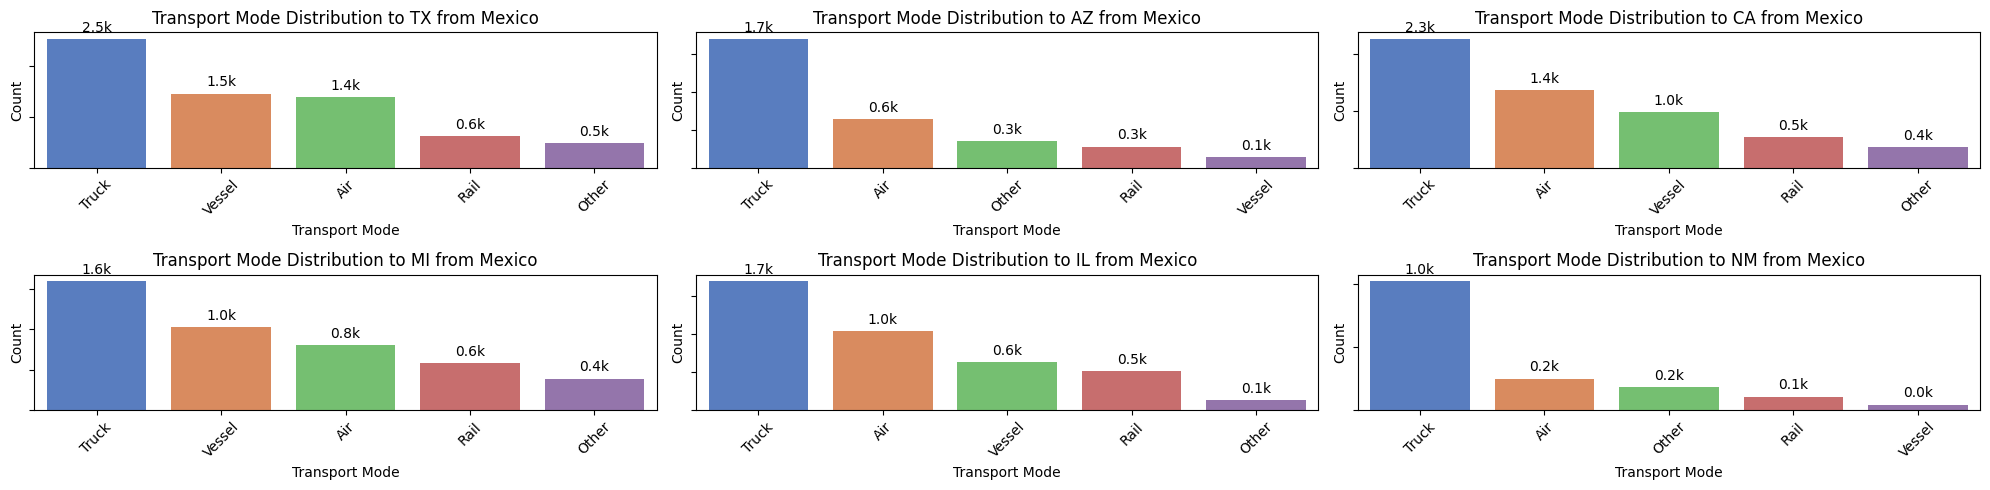

In [160]:
# Define the states to analyze
states_to_analyze = ['TX', 'AZ', 'CA', 'MI', 'IL', 'NM']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5), sharey=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through each state and create a subplot
for i, state in enumerate(states_to_analyze):
    # Subset the data for the current state
    df_state = df_imports_mexico[df_imports_mexico['USASTATE'] == state]

    # Get the top 5 transport modes
    top5_import_transport_modes = df_state['DISAGMOT'].value_counts().nlargest(5)

    # Plot the data
    sns.barplot(x=top5_import_transport_modes.index, y=top5_import_transport_modes.values, ax=axes[i], palette='muted', hue=top5_import_transport_modes.index, legend=False)
    axes[i].set_title(f'Transport Mode Distribution to {state} from Mexico')
    axes[i].set_xlabel('Transport Mode')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelleft=False)

    # Annotate with percentage values
    for container in axes[i].containers:
        # Each container contains bars for one hue group
        labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
        axes[i].bar_label(container, labels=labels, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

- Truck and air dominate as the widely used transport modes when importing goods from Mexico.
- However, goods from Mexico get to US states via more varied transport modes as compared to Canada.

### Data Explore states in Mexico and Canada

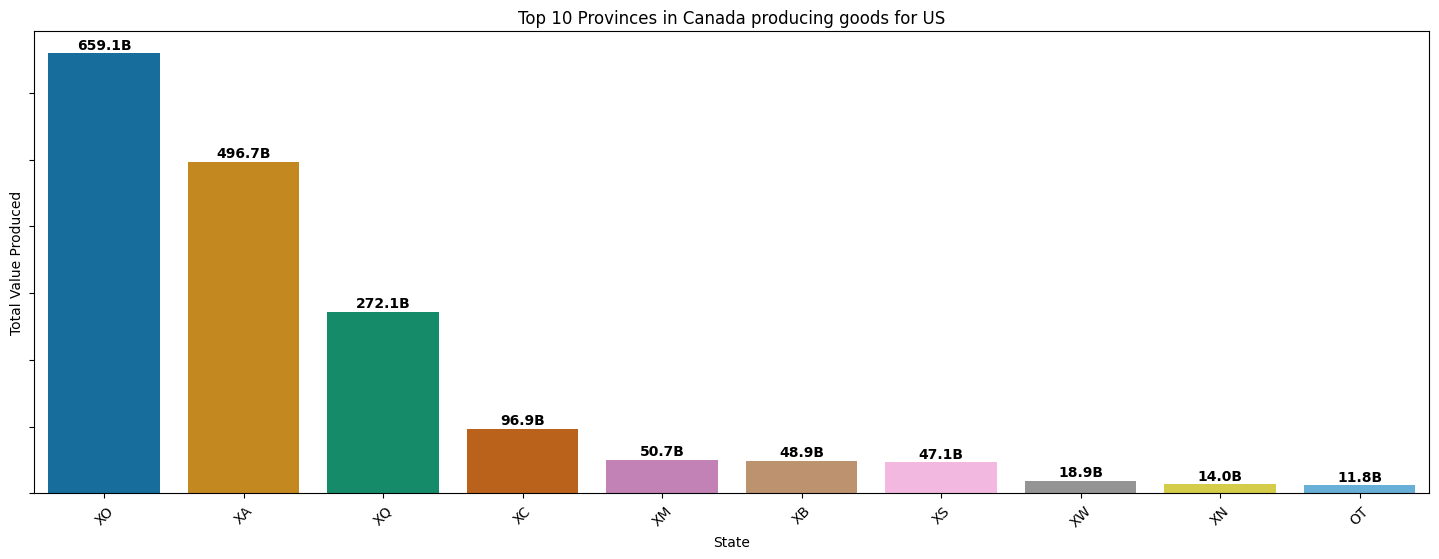

In [161]:
# Calculate total values produced by state for each dataframe
state_receiving_import1 = df_imports_canada.groupby('CANPROV')['VALUE'].sum().sort_values(ascending=False)
state_receiving_import2 = df_imports_mexico.groupby('MEXSTATE')['VALUE'].sum().sort_values(ascending=False)

# Get top 10 states
top10_provinces_for_canada_import = state_receiving_import1.head(10)
top10_provinces_for_mexico_import = state_receiving_import2.head(10)

# Format values in billions
def format_billion(x):
    return f"{x / 1e9:.1f}B"

# Create the plot
fig, ax= plt.subplots(figsize=(18, 6))#, sharey=True)

# Plot for Canada
sns.barplot(x=top10_provinces_for_canada_import.index, y=top10_provinces_for_canada_import.values, ax=ax, palette='colorblind', hue=top10_provinces_for_canada_import.index, legend=False)
ax.set_title('Top 10 Provinces in Canada producing goods for US')
ax.set_xlabel('State')
ax.set_ylabel('Total Value Produced')
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', labelleft=False)

# Annotate each bar with shortened value
for bar in ax.patches:
    height = bar.get_height()
    label = format_billions(height)
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 2e9,  # slightly above the bar
        label,
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.show()

Canada
- US imports more from Ontario, Alberta, Quebec, British Columbia and Manitoba.

Mexico
- None of the states that import goods to US are known.

### Freight type analysis

In [162]:
# Import charges per freight type - Canada

canada_freight_import_pivot = df_imports_canada.pivot_table(values='FREIGHT_CHARGES', index=['COUNTRY', 'DISAGMOT'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
canada_freight_import_pivot.map(lambda x: f"${x:,.2f}")

min              max  \
                                   FREIGHT_CHARGES  FREIGHT_CHARGES   
COUNTRY DISAGMOT                                                      
Canada  Air                                  $0.00    $7,515,586.00   
        Foreign Trade Zones (FTZs)           $1.00    $6,618,381.00   
        Mail (US Postal Service)             $7.00        $4,776.00   
        Other                                $0.00    $1,014,181.00   
        Pipeline                             $1.00  $227,553,073.00   
        Rail                                 $1.00   $14,405,040.00   
        Truck                                $1.00   $12,284,165.00   
        Vessel                               $0.00    $9,478,227.00   

                                              mean  
                                   FREIGHT_CHARGES  
COUNTRY DISAGMOT                                    
Canada  Air                              $8,862.79  
        Foreign Trade Zones (FTZs)      $88,893.75  
        Mail (US Postal Service)         $1,325.27  
        Other                            $7,836.25  
        Pipeline                     $8,275,633.36  
        Rail                            $59,851.13  
        Truck                           $33,983.89  
        Vessel                         $172,326.14

In [163]:
# Import charges per freight type - Mexico

mexico_freight_import_pivot = df_imports_mexico.pivot_table(values='FREIGHT_CHARGES', index=['COUNTRY', 'DISAGMOT'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
mexico_freight_import_pivot.map(lambda x: f"${x:,.2f}")

min             max  \
                                   FREIGHT_CHARGES FREIGHT_CHARGES   
COUNTRY DISAGMOT                                                     
Mexico  Air                                  $0.00   $3,578,188.00   
        Foreign Trade Zones (FTZs)           $1.00  $51,478,333.00   
        Mail (US Postal Service)             $2.00          $22.00   
        Other                                $0.00     $268,361.00   
        Pipeline                             $1.00     $239,657.00   
        Rail                                 $1.00   $6,922,042.00   
        Truck                                $1.00  $37,801,973.00   
        Vessel                               $0.00  $30,054,391.00   

                                              mean  
                                   FREIGHT_CHARGES  
COUNTRY DISAGMOT                                    
Mexico  Air                             $27,306.93  
        Foreign Trade Zones (FTZs)     $356,990.90  
        Mail (US Postal Service)            $12.00  
        Other                            $3,863.98  
        Pipeline                        $51,579.36  
        Rail                           $173,442.11  
        Truck                          $180,084.12  
        Vessel                         $325,487.91

- Average freight cost across majority of transport modes cost higher in Mexico than Canada.
- It is likely because goods are not imported from Mexico in large quantities, the yearly freight cost is lower.
- This could be an influencing factor as to why fewer Mexican products are imported. The per transport type freight charge is high.

Freight

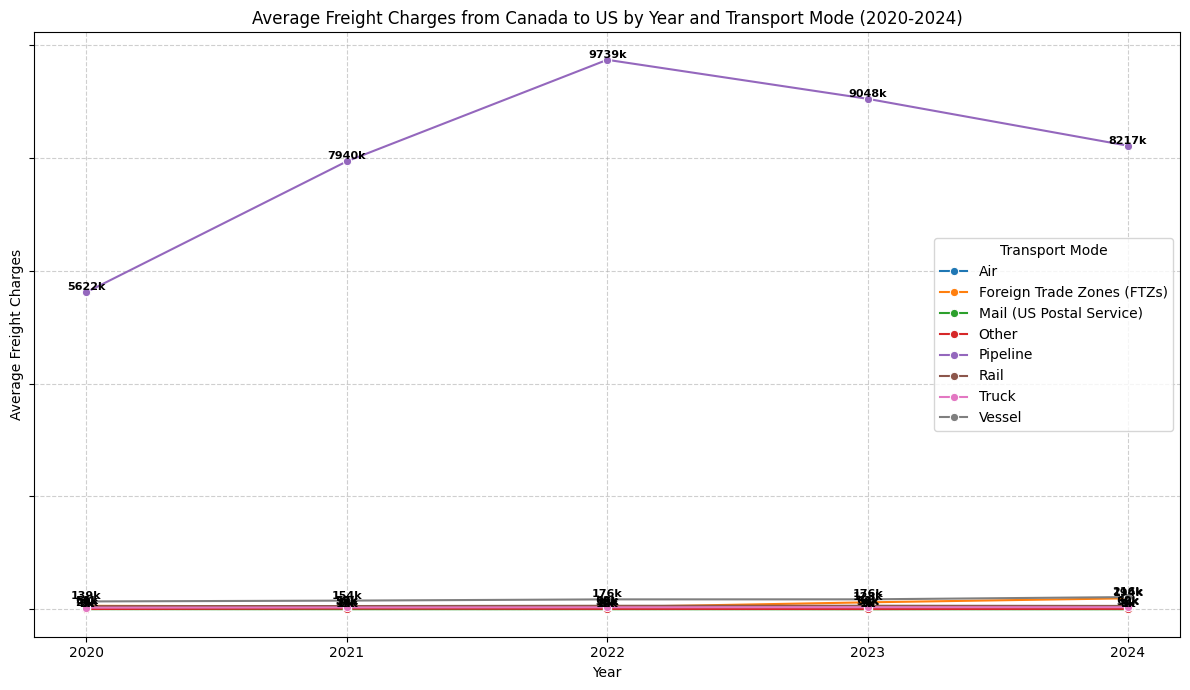

In [164]:
# Filter data for exports to Canada and within the years 2020-2024
df_imports_canada_filtered = df_imports_canada[(df_imports_canada['YEAR'] >= 2020)&(df_imports_canada['YEAR'] <= 2024)].copy()

# Group by year and transport mode, then calculate the mean freight charges
freight_charges_by_year_transport_import = df_imports_canada_filtered.groupby(['YEAR', 'DISAGMOT'])['FREIGHT_CHARGES'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=freight_charges_by_year_transport_import,
    x='YEAR',
    y='FREIGHT_CHARGES',
    hue='DISAGMOT',
    marker='o'
)

# Annotate each point with the correct FREIGHT_CHARGES per DISAGMOT
for disagmot in freight_charges_by_year_transport_import['DISAGMOT'].unique():
    subset = freight_charges_by_year_transport_import[freight_charges_by_year_transport_import['DISAGMOT'] == disagmot]
    for i in range(len(subset)):
        row = subset.iloc[i]
        plt.text(
            x=row['YEAR'],
            y=row['FREIGHT_CHARGES'],
            s=f"{row['FREIGHT_CHARGES']/1000:.0f}k",  # Rounded label
            ha='center',
            va='bottom',
            fontsize=8,
            fontweight='bold'
        )

# Add titles and labels
plt.title('Average Freight Charges from Canada to US by Year and Transport Mode (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Freight Charges')
plt.xticks(range(2020, 2025)) # Ensure all years from 2020 to 2024 are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Transport Mode')
plt.tick_params(axis='y', labelleft=False)


# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

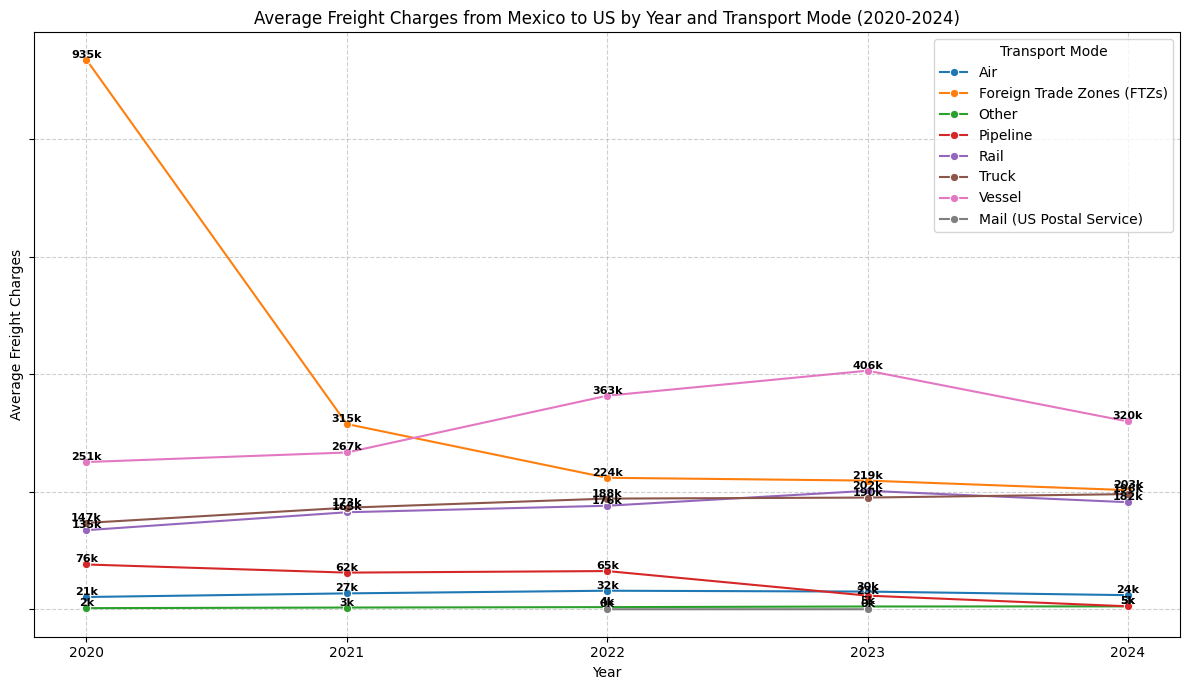

In [165]:
# Filter data for exports to Canada and within the years 2020-2024
df_imports_mexico_filtered = df_imports_mexico[(df_imports_mexico['YEAR'] >= 2020)&(df_imports_mexico['YEAR'] <= 2024)].copy()

# Group by year and transport mode, then calculate the mean freight charges
freight_charges_by_year_transport_import_mex = df_imports_mexico_filtered.groupby(['YEAR', 'DISAGMOT'])['FREIGHT_CHARGES'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=freight_charges_by_year_transport_import_mex,
    x='YEAR',
    y='FREIGHT_CHARGES',
    hue='DISAGMOT',
    marker='o'
)

# Annotate each point with the correct FREIGHT_CHARGES per DISAGMOT
for disagmot in freight_charges_by_year_transport_import_mex['DISAGMOT'].unique():
    subset = freight_charges_by_year_transport_import_mex[freight_charges_by_year_transport_import_mex['DISAGMOT'] == disagmot]
    for i in range(len(subset)):
        row = subset.iloc[i]
        plt.text(
            x=row['YEAR'],
            y=row['FREIGHT_CHARGES'],
            s=f"{row['FREIGHT_CHARGES']/1000:.0f}k",  # Rounded label
            ha='center',
            va='bottom',
            fontsize=8,
            fontweight='bold'
        )

# Add titles and labels
plt.title('Average Freight Charges from Mexico to US by Year and Transport Mode (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Freight Charges')
plt.xticks(range(2020, 2025)) # Ensure all years from 2020 to 2024 are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Transport Mode')
plt.tick_params(axis='y', labelleft=False)


# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

- Average freight charges for Canadian goods cost on average lower than $300k across the 5 years, with the exception of natural resources.

- Average freight charges for Mexican goods soar around $500k over the same period.

Cost

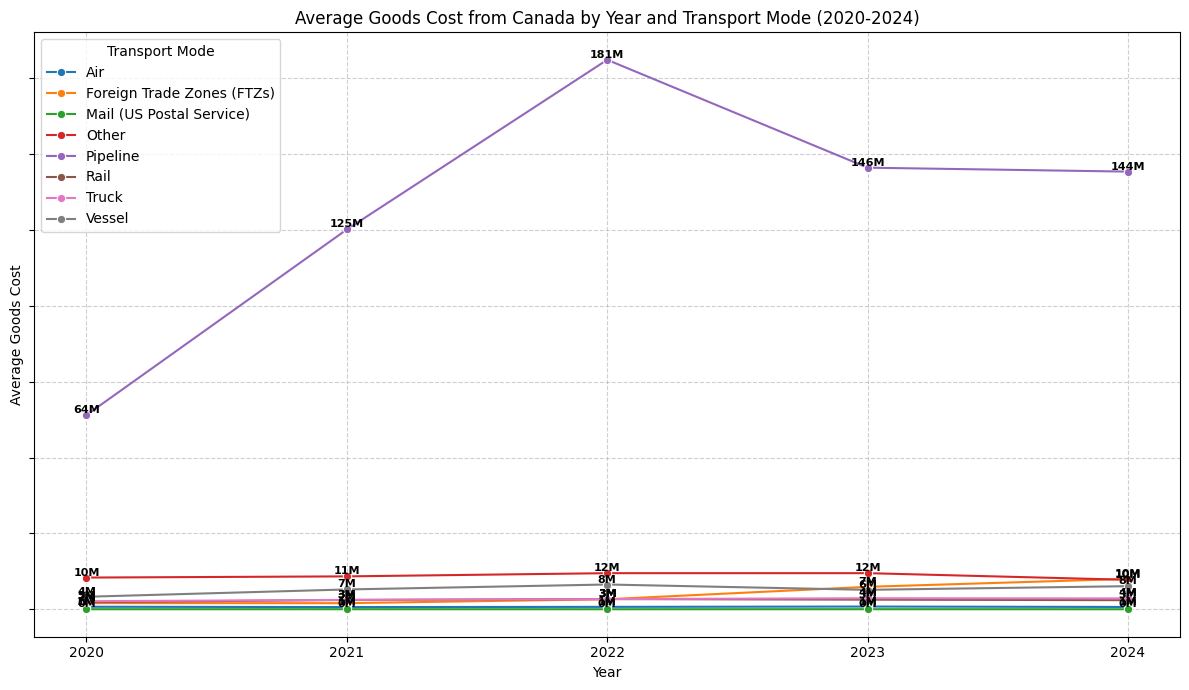

In [166]:
# Filter data for exports to Canada and within the years 2020-2024
df_imports_canada_filtered = df_imports_canada[(df_imports_canada['YEAR'] >= 2020)&(df_imports_canada['YEAR'] <= 2024)].copy()

# Group by year and transport mode, then calculate the mean freight charges
value_cost_by_import_canada = df_imports_canada_filtered.groupby(['YEAR', 'DISAGMOT'])['VALUE'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=value_cost_by_import_canada,
    x='YEAR',
    y='VALUE',
    hue='DISAGMOT',
    marker='o'
)

for disagmot in value_cost_by_import_canada['DISAGMOT'].unique():
    subset = value_cost_by_import_canada[value_cost_by_import_canada['DISAGMOT'] == disagmot]
    for i in range(len(subset)):
        row = subset.iloc[i]
        plt.text(
            x=row['YEAR'],
            y=row['VALUE'],
            s=f"{row['VALUE']/1000000:.0f}M",  # Rounded label
            ha='center',
            va='bottom',
            fontsize=8,
            fontweight='bold'
        )

# Add titles and labels
plt.title('Average Goods Cost from Canada by Year and Transport Mode (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Goods Cost')
plt.xticks(range(2020, 2025)) # Ensure all years from 2020 to 2024 are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Transport Mode')
plt.tick_params(axis='y', labelleft=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

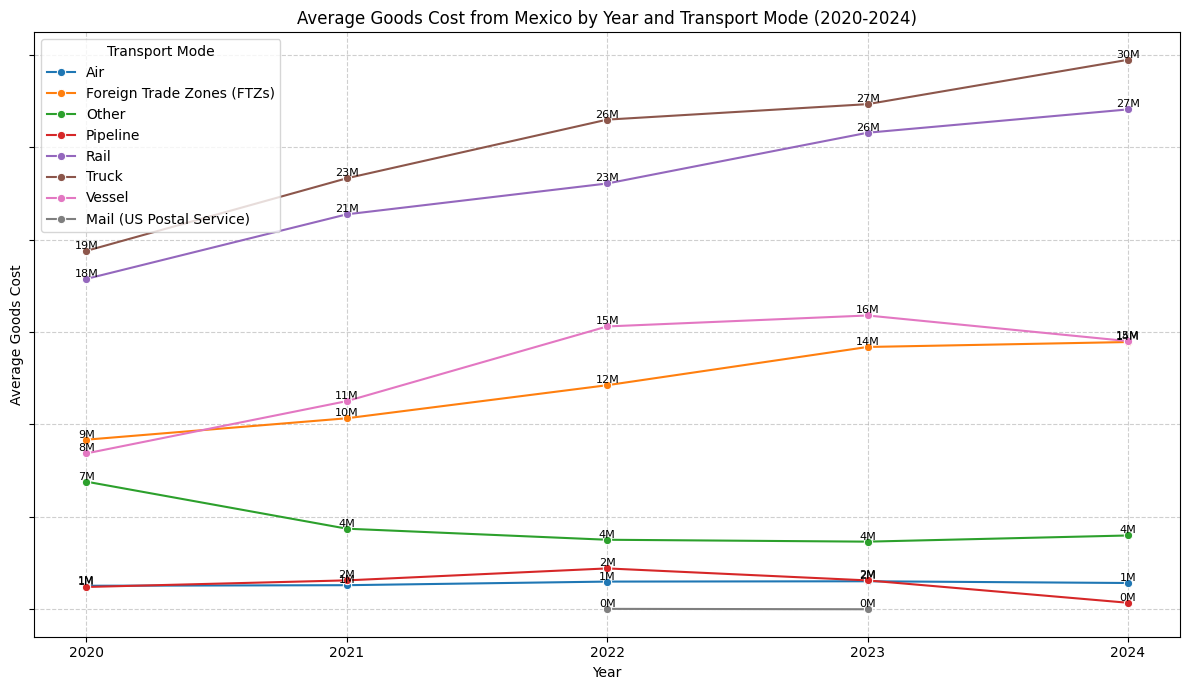

In [167]:
# Filter data for exports to Mexico and within the years 2020-2024
df_exports_mexico_filtered = df_imports_mexico[(df_imports_mexico['YEAR'] >= 2020)&(df_imports_mexico['YEAR'] <= 2024)].copy()

# Group by year and transport mode, then calculate the mean freight charges
value_cost_by_import_mexico = df_imports_mexico_filtered.groupby(['YEAR', 'DISAGMOT'])['VALUE'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=value_cost_by_import_mexico,
    x='YEAR',
    y='VALUE',
    hue='DISAGMOT',
    marker='o'
)

for disagmot in value_cost_by_import_mexico['DISAGMOT'].unique():
    subset = value_cost_by_import_mexico[value_cost_by_import_mexico['DISAGMOT'] == disagmot]
    for i in range(len(subset)):
        row = subset.iloc[i]
        plt.text(
            x=row['YEAR'],
            y=row['VALUE'],
            s=f"{row['VALUE']/1000000:.0f}M",  # Rounded label
            ha='center',
            va='bottom',
            fontsize=8
        )

# Add titles and labels
plt.title('Average Goods Cost from Mexico by Year and Transport Mode (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Goods Cost')
plt.xticks(range(2020, 2025)) # Ensure all years from 2020 to 2024 are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Transport Mode')
plt.tick_params(axis='y', labelleft=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

- Besides pipeline goods, Canadian imports cost lesser than the goods from Mexico.

Container types

In [168]:
# Costliest freight type

canada_trans_import_pivot = df_imports_canada.pivot_table(values='VALUE', index=['COUNTRY', 'DISAGMOT','CONTCODE'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
canada_trans_import_pivot.map(lambda x: f"${x:,.2f}")

min                max  \
                                                 VALUE              VALUE   
COUNTRY DISAGMOT                   CONTCODE                                 
Canada  Air                        0           $252.00    $505,758,073.00   
                                   1           $327.00      $4,436,618.00   
        Foreign Trade Zones (FTZs) 0           $251.00    $454,071,922.00   
                                   1         $2,066.00      $6,316,493.00   
        Mail (US Postal Service)   0         $4,283.00         $50,000.00   
        Other                      0           $334.00    $966,974,324.00   
                                   1         $1,150.00        $209,630.00   
        Pipeline                   0         $2,051.00  $4,727,759,929.00   
        Rail                       0           $276.00  $1,081,367,970.00   
                                   1           $270.00    $254,741,084.00   
        Truck                      0           $251.00  $1,562,297,386.00   
                                   1           $270.00     $86,425,938.00   
        Vessel                     0           $300.00    $479,931,818.00   
                                   1           $251.00     $69,475,748.00   

                                                        mean  
                                                       VALUE  
COUNTRY DISAGMOT                   CONTCODE                   
Canada  Air                        0             $809,228.49  
                                   1             $125,079.95  
        Foreign Trade Zones (FTZs) 0           $5,102,664.76  
                                   1             $471,589.16  
        Mail (US Postal Service)   0              $18,445.62  
        Other                      0          $11,250,851.43  
                                   1              $41,830.29  
        Pipeline                   0         $135,958,974.99  
        Rail                       0           $3,508,644.79  
                                   1           $2,205,340.83  
        Truck                      0           $3,499,386.10  
                                   1             $458,786.52  
        Vessel                     0          $14,033,403.13  
                                   1             $487,851.69

In [169]:
mexico_trans_import_pivot = df_imports_mexico.pivot_table(values='VALUE', index=['COUNTRY', 'DISAGMOT','CONTCODE'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
mexico_trans_import_pivot.map(lambda x: f"${x:,.2f}")

min                max  \
                                                 VALUE              VALUE   
COUNTRY DISAGMOT                   CONTCODE                                 
Mexico  Air                        0           $251.00    $173,812,434.00   
                                   1           $254.00      $1,573,146.00   
        Foreign Trade Zones (FTZs) 0           $289.00    $177,503,554.00   
                                   1           $259.00     $15,484,074.00   
        Mail (US Postal Service)   0           $438.00         $21,279.00   
        Other                      0           $251.00    $290,585,144.00   
        Pipeline                   0         $5,453.00     $13,003,253.00   
        Rail                       0           $502.00  $1,862,990,364.00   
                                   1           $258.00    $316,058,249.00   
        Truck                      0           $252.00  $4,951,806,412.00   
                                   1           $261.00    $258,843,014.00   
        Vessel                     0           $273.00    $719,864,083.00   
                                   1           $256.00    $152,587,991.00   

                                                       mean  
                                                      VALUE  
COUNTRY DISAGMOT                   CONTCODE                  
Mexico  Air                        0          $1,428,342.35  
                                   1             $59,941.11  
        Foreign Trade Zones (FTZs) 0         $14,107,482.98  
                                   1          $2,424,139.85  
        Mail (US Postal Service)   0             $10,858.50  
        Other                      0          $4,181,327.58  
        Pipeline                   0          $1,517,513.20  
        Rail                       0         $34,481,016.29  
                                   1          $7,118,236.54  
        Truck                      0         $27,403,471.84  
                                   1          $6,128,757.22  
        Vessel                     0         $43,430,468.38  
                                   1          $2,105,584.30

All imported goods are not containerized. The 1 container type is unlisted.


Ship weight

In [170]:
canada_import_weight_pivot = df_imports_canada.pivot_table(values='SHIPWT', index=['COUNTRY', 'DISAGMOT'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
canada_import_weight_pivot.map(lambda x: f"{x:,.2f}kg")

min                 max  \
                                    SHIPWT              SHIPWT   
COUNTRY DISAGMOT                                                 
Canada  Air                         0.00kg        529,340.00kg   
        Foreign Trade Zones (FTZs)  1.00kg    967,595,389.00kg   
        Mail (US Postal Service)    1.00kg            225.00kg   
        Other                       0.00kg     17,300,436.00kg   
        Pipeline                    0.00kg  8,563,935,547.00kg   
        Rail                        0.00kg  1,155,402,249.00kg   
        Truck                       0.00kg    419,529,737.00kg   
        Vessel                      0.00kg    441,924,623.00kg   

                                                mean  
                                              SHIPWT  
COUNTRY DISAGMOT                                      
Canada  Air                               2,338.57kg  
        Foreign Trade Zones (FTZs)    9,314,521.27kg  
        Mail (US Postal Service)             27.65kg  
        Other                            35,661.97kg  
        Pipeline                    276,100,210.74kg  
        Rail                          3,413,537.38kg  
        Truck                         1,046,026.27kg  
        Vessel                       17,759,039.00kg

In [171]:
mexico_import_weight_pivot = df_imports_mexico.pivot_table(values='SHIPWT', index=['COUNTRY', 'DISAGMOT'], aggfunc=['min','max','mean'])#.apply(lambda x: f"{x:,.0f}")
mexico_import_weight_pivot.map(lambda x: f"{x:,.2f}kg")

min                 max  \
                                         SHIPWT              SHIPWT   
COUNTRY DISAGMOT                                                      
Mexico  Air                              0.00kg      2,707,649.00kg   
        Foreign Trade Zones (FTZs)       1.00kg     67,464,619.00kg   
        Mail (US Postal Service)         1.00kg          6,356.00kg   
        Other                            0.00kg     12,522,959.00kg   
        Pipeline                    85,068.00kg     46,489,590.00kg   
        Rail                             1.00kg    352,228,765.00kg   
        Truck                            0.00kg  2,067,776,222.00kg   
        Vessel                           1.00kg  1,245,885,838.00kg   

                                               mean  
                                             SHIPWT  
COUNTRY DISAGMOT                                     
Mexico  Air                             12,007.63kg  
        Foreign Trade Zones (FTZs)     925,568.13kg  
        Mail (US Postal Service)         3,178.50kg  
        Other                          244,986.54kg  
        Pipeline                     5,393,148.45kg  
        Rail                         6,737,613.04kg  
        Truck                        4,778,711.70kg  
        Vessel                      16,439,506.30kg

- US imports from Canada more goods through FTZs and Pipeline judging by the ship weight.
- Mexican goods have on average large ship weights. This will come at a cost and explain why fewer, perhaps only essential products are imported.

### Commodity types analysis

**Commodity types**  <br>
22 Beverages, spirits and vinegar <br>
23 Residues and waste from the food industries; Prepared animal feed <br>
24 Tobacco and manufactured tobacco substitutes <br>
25 Salt; Sulfur; Earths and stone; Plastering materials, lime and cement <br>
26 Ores, slag and ash <br>
27 Mineral fuels, mineral oils and products of their distillation; Bituminous substances; Mineral waxes <br>
28 Inorganic chemicals; Organic or inorganic compounds of precious metals, of rare-earth metals, of radioactive elements or of isotopes <br>
29 Organic chemicals <br>
44 Wood and articles of wood; Wood charcoal <br>
47 Pulp of wood or of other fibrous cellulosic material; Waste and scrap of paper or paperboard

**Commodity codes explained** <br>
38 Miscellaneous chemical products <br>
39 Plastics and articles thereof <br>
40 Rubber and articles thereof <br>
48 Paper and paperboard; Articles of paper pulp, of paper or of paperboard <br>
72 Iron and steel <br>
73 Articles of iron or steel <br>
82 Tools, implements, cutlery, spoons and forks, of base metal; Parts thereof of base metal <br>
83 Miscellaneous articles of base metal <br>
84 Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof <br>
85 Electrical machinery and equipment and parts thereof; Sound recorders and reproducers, television image and sound recorders and reproducers, and parts and accessories of such articles <br>
86 Railway or tramway locomotives, rolling stock and parts thereof; railway or tramway track fixtures and fittings and parts thereof; Mechanical (including electromechanical) traffic signaling equipment of all kinds <br>
87 Vehicles, other than railway or tramway rolling stock, and parts and accessories thereof <br>
90 Optical, photographic, cinematographic, measuring, checking, precision, medical or surgical instruments and apparatus; Parts and accessories thereof <br>
94 Furniture; Bedding, mattress supports, cushions and similar stuffed furnishings; Lamps and lighting fittings, not elsewhere specified or included; Illuminated signs, illuminated nameplates and the like; Prefabricated buildings <br>

In [172]:
# Check dominant commodity types
print("For Canada")
df_check_can = df2[df2['COUNTRY']=='Canada']
print(df_check_can['COMMODITY2'].value_counts())
print("="*40)
print("For Mexico")
df_check_mex = df2[df2['COUNTRY']=='Mexico']
print(df_check_mex['COMMODITY2'].value_counts())

For Canada
COMMODITY2
84    108667
85     96425
39     92089
90     82166
73     67398
       ...  
53      2114
24      1714
45      1666
50       664
99        54
Name: count, Length: 98, dtype: int64
For Mexico
COMMODITY2
84    110217
39     93658
85     93418
87     89717
73     66804
       ...  
14      1003
53       755
43       340
50       201
99        54
Name: count, Length: 98, dtype: int64


Indeed, essential goods and heavy machinery are imported from Mexico.

In [173]:
# Country specific imports for commodity type analysis
df2_canada = df2[(df2['COUNTRY'] == 'Canada')&(df2['TRDTYPE'] == 2)].copy()

df2_mexico = df2[(df2['COUNTRY'] == 'Mexico')&(df2['TRDTYPE'] == 2)].copy()

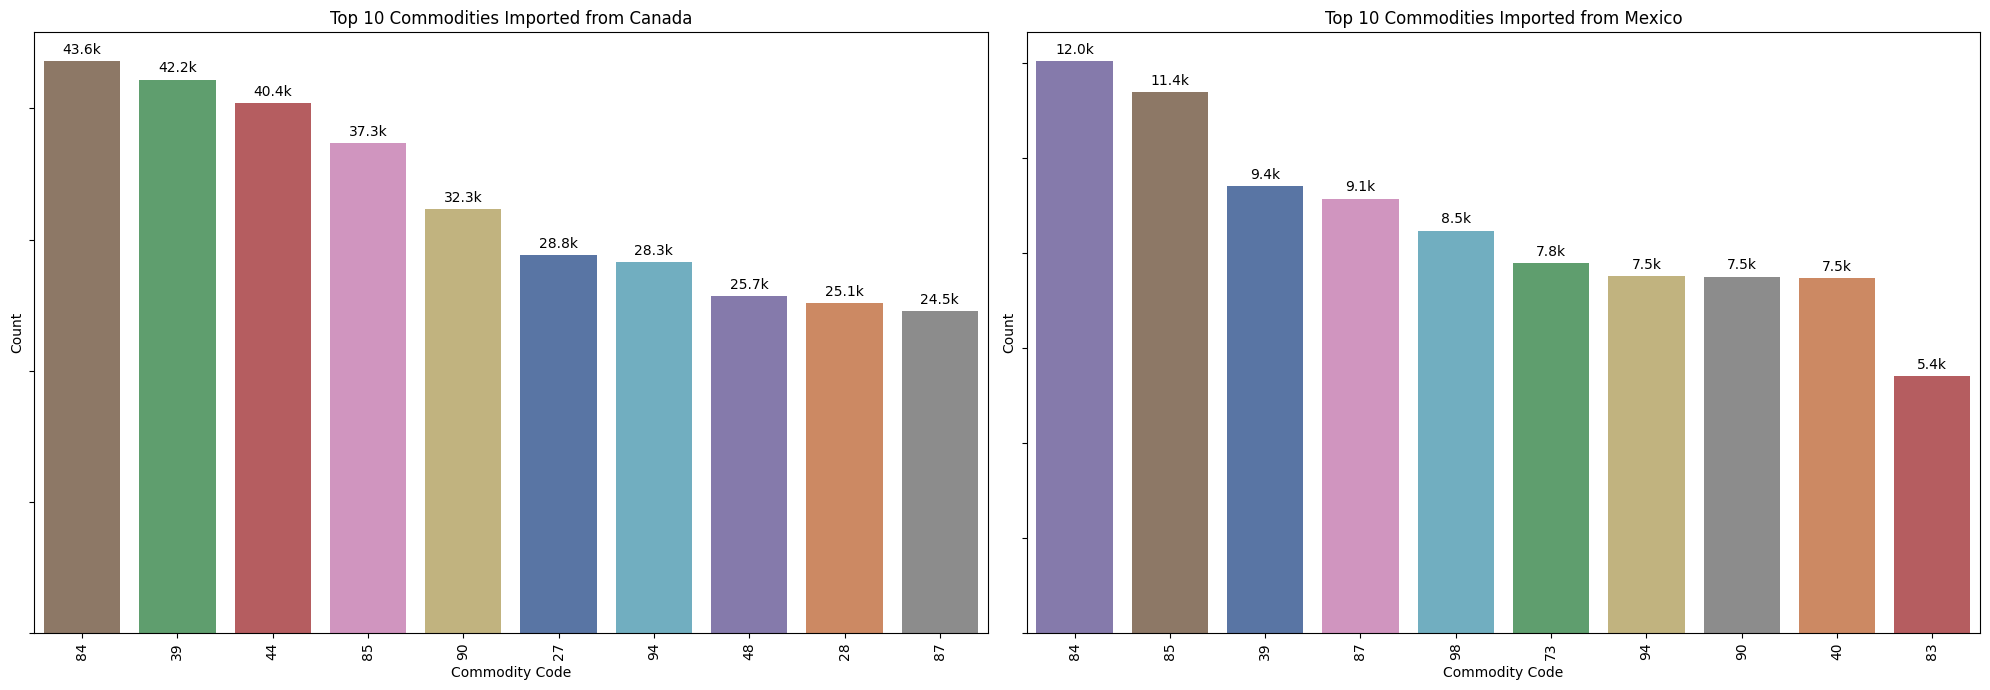

In [174]:
# Analyze top 10 commodities imports from Canada
top10_canada = df2_canada['COMMODITY2'].value_counts().nlargest(10)
top10_mexico = df2_mexico['COMMODITY2'].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Canada
sns.barplot(x=top10_canada.index, y=top10_canada.values, ax=axes[0], palette='deep', hue=top10_canada.index, legend=False, order=top10_canada.index)
axes[0].set_title('Top 10 Commodities Imported from Canada')
axes[0].set_xlabel('Commodity Code')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', labelleft = False)

# Annotate with percentage values
for container in axes[0].containers:
    # Each container contains bars for one hue group
    labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
    axes[0].bar_label(container, labels=labels, label_type='edge', padding=3)

# Mexico
sns.barplot(x=top10_mexico.index, y=top10_mexico.values, ax=axes[1], palette='deep', hue=top10_mexico.index, legend=False, order=top10_mexico.index)
axes[1].set_title('Top 10 Commodities Imported from Mexico')
axes[1].set_xlabel('Commodity Code')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', labelleft = False)

# Annotate with percentage values
for container in axes[1].containers:
    # Each container contains bars for one hue group
    labels = [f"{bar.get_height()/1000:.1f}k" for bar in container]
    axes[1].bar_label(container, labels=labels, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

- The chart above shows the bulk of imported materials from Canada and Mexico.